In [1]:
#OLÁAAA

# Text Mining Project

Text Mining project


In [1]:


#ola


In [2]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [3]:


train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")



## Data exploration

In [4]:
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [5]:
train_reviews.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [6]:
test.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [7]:
test_reviews.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [8]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)


train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


in DATASETS the index repeats, which may indicate that refers to a specific house. We'll change this column to house ID


In [9]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)



In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248 entries, 0 to 6247
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   houseID      6248 non-null   int64 
 1   description  6248 non-null   object
 2   host_about   6248 non-null   object
 3   unlisted     6248 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 195.4+ KB


there's no missing values in any feature

In [11]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361281 entries, 0 to 361280
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   houseID   361281 non-null  int64 
 1   comments  361281 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.5+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   houseID      695 non-null    int64 
 1   description  695 non-null    object
 2   host_about   695 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.4+ KB


In [13]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41866 entries, 0 to 41865
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   houseID   41866 non-null  int64 
 1   comments  41866 non-null  object
dtypes: int64(1), object(1)
memory usage: 654.3+ KB


In [14]:
train

,houseID,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0


In [15]:
train_reviews

,houseID,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
...,...,...
361276,6248,The location was perfect. The apartment was ve...
361277,6248,Ana's place is exactly as described and even b...
361278,6248,A Ana foi muito atenciosa e preocupou se com o...
361279,6248,No wifi nor answer. <br/>The wifi can’t be con...


In [16]:
train = train.copy()
train_reviews = train_reviews.copy()
test = test.copy()
test_reviews = test_reviews.copy()

In [17]:
train.duplicated().sum()

0

In [18]:
train_reviews.duplicated().sum()

142

In [19]:
duplicates_train_reviews =train_reviews[train_reviews.duplicated(keep=False)]
print(duplicates_train_reviews)


        houseID                                           comments
3248         61                                         Excelente!
3254         61                                         Excelente!
4225         70                              Everything was great!
4263         70                              Everything was great!
6584        144  Sofia is an incredible host, and made us feel ...
...         ...                                                ...
353703     6106                                              Super
358567     6182                                    Great location!
358568     6182                                    Great location!
359054     6202                                        Great place
359076     6202                                        Great place

[273 rows x 2 columns]


In [20]:
test.duplicated().sum()

0

In [21]:
test_reviews.duplicated().sum()

15

In [22]:
duplicates_test_reviews =test_reviews[test_reviews.duplicated(keep=False)]
print(duplicates_test_reviews)

       houseID                                           comments
1622        42                                        Great place
1645        42                                        Great place
8862       155                                               Good
8884       155                                               Good
11302      178                                       Great place!
11416      178                                    Great location!
11445      178                                    Great location!
11454      178                                       Great place!
11631      179                                                  .
11829      179                                                  .
16030      246  We had a nice stay and friendly contacts. Than...
16031      246  We had a nice stay and friendly contacts. Than...
16685      255                                                  .
16783      255                                                  .
18846     

In [23]:
train.isna().sum()


houseID        0
description    0
host_about     0
unlisted       0
dtype: int64

In [24]:
train_reviews.isna().sum()

houseID     0
comments    0
dtype: int64

In [25]:
test.isna().sum()

houseID        0
description    0
host_about     0
dtype: int64

In [26]:
test_reviews.isna().sum()

houseID     0
comments    0
dtype: int64

In [27]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
houseID,6248.0,3124.500000,1803.786573,1.0,1562.75,3124.5,4686.25,6248.0
unlisted,6248.0,0.273367,0.445724,0.0,0.00,0.0,1.00,1.0


In [28]:
properties_with_reviews= print(train_reviews["houseID"].nunique() )
total_properties= print(train["houseID"].nunique()) 
properties_without_reviews = print(train["houseID"].nunique() - train_reviews["houseID"].nunique())

#average reviews per property

average_reviews_per_property = train_reviews["houseID"].value_counts().mean()

print(average_reviews_per_property)



#now for test

properties_with_reviews_test= print(test_reviews["houseID"].nunique() )
total_properties_test= print(test["houseID"].nunique())
properties_without_reviews_test = print(test["houseID"].nunique() - test_reviews["houseID"].nunique())

#average reviews per property

average_reviews_per_property_test = test_reviews["houseID"].value_counts().mean()

average_reviews_per_property_test





4245
6248
2003
85.10742049469965
475
695
220


88.13894736842106

- 4245 houses with reviews, and 2003 houses without reviews in a total of 6248 unique houses
- the average of reviews for house is 85.1074 for train and 88.13 for test

In [29]:


# Calculate the distribution of 'unlisted' for properties with reviews
with_reviews_indices = set(train_reviews['houseID'])
unlisted_with_reviews = train[train['houseID'].isin(with_reviews_indices)]['unlisted'].value_counts(normalize=True) * 100

# Calculate the distribution of 'unlisted' for properties without reviews
unlisted_without_reviews = train[~train['houseID'].isin(with_reviews_indices)]['unlisted'].value_counts(normalize=True) * 100

# Print the results

print("\nDistribution of 'unlisted' for properties with reviews:")
print(unlisted_with_reviews)
print("\nDistribution of 'unlisted' for properties without reviews:")
print(unlisted_without_reviews)



Distribution of 'unlisted' for properties with reviews:
0    93.710247
1     6.289753
Name: unlisted, dtype: float64

Distribution of 'unlisted' for properties without reviews:
1    71.942087
0    28.057913
Name: unlisted, dtype: float64


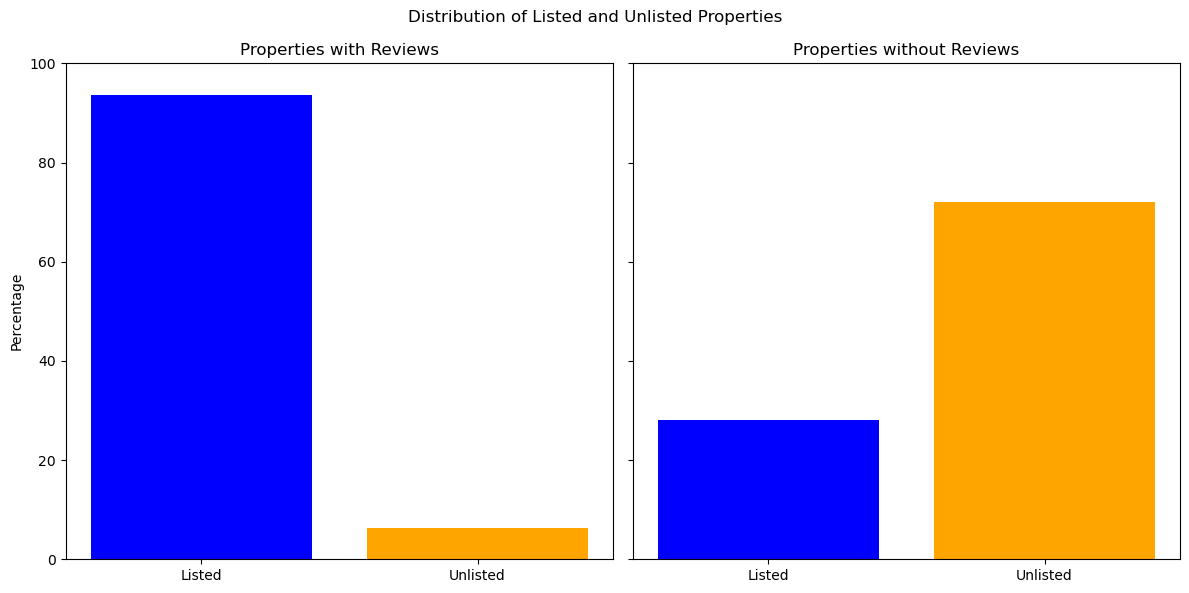

In [30]:

labels = ['Listed', 'Unlisted']
with_reviews = [unlisted_with_reviews.get(0, 0), unlisted_with_reviews.get(1, 0)]
without_reviews = [unlisted_without_reviews.get(0, 0), unlisted_without_reviews.get(1, 0)]

x = range(len(labels))

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for properties with reviews
ax[0].bar(x, with_reviews, color=['blue', 'orange'])
ax[0].set_title('Properties with Reviews')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Percentage')
ax[0].set_ylim(0, 100)

# Plot for properties without reviews
ax[1].bar(x, without_reviews, color=['blue', 'orange'])
ax[1].set_title('Properties without Reviews')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_ylim(0, 100)

# Add overall title
fig.suptitle('Distribution of Listed and Unlisted Properties')

# Show the plot
plt.tight_layout()
plt.show()

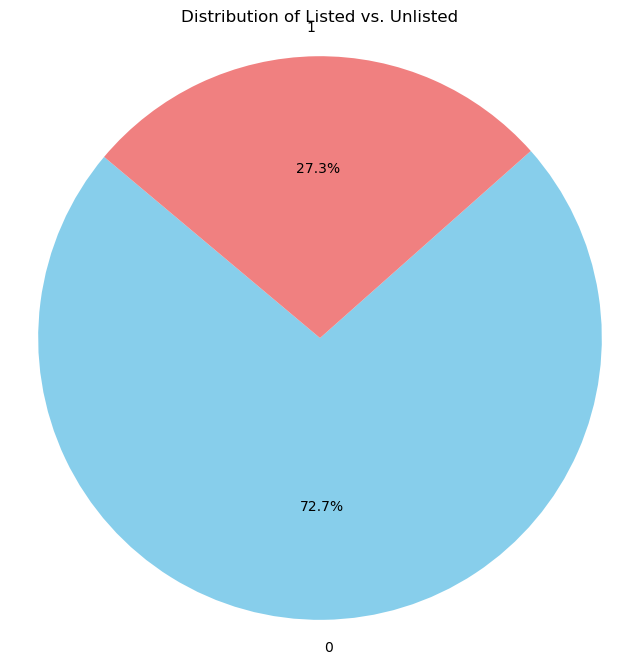

In [31]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

In [32]:

merged_data = train.merge(train_reviews,
                                    on='houseID',
                                    how='left')


test_merged_data = test.merge(test_reviews,
                                  on='houseID',
                                  how='left')



print(f'Train merged shape: {merged_data.shape}')
print(f'Test merged shape: {test_merged_data.shape}')

Train merged shape: (363284, 5)
Test merged shape: (42086, 4)


In [33]:
merged_data

,houseID,description,host_about,unlisted,comments
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ..."
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe..."
...,...,...,...,...,...
363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,The location was perfect. The apartment was ve...
363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,Ana's place is exactly as described and even b...
363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,A Ana foi muito atenciosa e preocupou se com o...
363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,No wifi nor answer. <br/>The wifi can’t be con...


In [34]:
test_merged_data

,houseID,description,host_about,comments
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Thank you very much Antonio ! All has been per...
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Very nice appartment in the old town of Lissab...
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",When travelling we're looking for kids friendl...
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",We've been in Lisbon in march 2013 (3 adults a...
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Our host Antonio was very helpful with informa...
...,...,...,...,...
42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Everything was fine!
42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Very good located
42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Appartement confortable conforme aux photos bi...
42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Très bon logement pour un week-end prolongé à ...


In [35]:
#check duplicates

merged_data.duplicated().sum()
duplicates = merged_data[merged_data.duplicated()]
print(duplicates)




        houseID                                        description  \
3274         61  Brand new apartment in Santo Amaro de Oeiras, ...   
4285         70  Este apartamento fica situado no bairro de São...   
6638        144  Watch sunsets over the river Tejo from the pri...   
7415        156  The apartment in Lisbon has 2 bedrooms and has...   
13042       254  <b>The space</b><br />A beautiful and conforta...   
...         ...                                                ...   
355109     6099  Amazing Mezzanine House with Private Garden at...   
355206     6099  Amazing Mezzanine House with Private Garden at...   
355662     6106  It is winter, and our place in this central bu...   
360547     6182  Our apartment is situated in the heart of down...   
361063     6202  A spectacular apartment in the center of the h...   

                                               host_about  unlisted  \
3274    We are a couple, that love our hometown Carcav...         0   
4285    Born in B

In [36]:
merged_data.drop_duplicates(inplace=True)

merged_data.duplicated().sum()

test_merged_data.drop_duplicates(inplace=True)

test_merged_data.duplicated().sum()

0

In [37]:
#check if it still has duplicates

print(merged_data.duplicated().sum())

0


In [38]:
#check missing values

merged_data.isna().sum()

houseID           0
description       0
host_about        0
unlisted          0
comments       2003
dtype: int64

In [39]:
test_merged_data.isna().sum()

houseID          0
description      0
host_about       0
comments       220
dtype: int64

In [40]:
# we can ensure the quality of the following transformations
# by creating new indexes - property index and review index



merged_data = merged_data.reset_index().rename(columns={'index': 'comment_index'})
test_merged_data = test_merged_data.reset_index().rename(columns={'index': 'comment_index'})

display(merged_data.head(5))

,comment_index,houseID,description,host_about,unlisted,comments
0,0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...
1,1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>
2,2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ..."
3,3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...
4,4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe..."


In [41]:
merged_data.isna().sum()

comment_index       0
houseID             0
description         0
host_about          0
unlisted            0
comments         2003
dtype: int64

In [42]:
test_merged_data.isna().sum()

comment_index      0
houseID            0
description        0
host_about         0
comments         220
dtype: int64

 For predicting whether an Airbnb listing is unlisted (0) or not (1), missing comments might indeed carry valuable information. The absence of comments could be an important feature in itself, potentially indicating something about the listing's status. Removing could lose some valuable info for predicting. 
 Different approaches : 
 

- Create a binary feature indicating whether a comment is missing (NaN) or not. This helps the model understand that the absence of a comment itself might be significant.
Fill Missing Comments with a Placeholder:

- Replace NaN values in the comments column with a placeholder text (e.g., "no_comment"). This ensures that all entries are treated as valid strings.

- both

In [43]:
merged_data['comments'].fillna('no_comment', inplace=True)
test_merged_data['comments'].fillna('no_comment', inplace=True)



In [44]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

merged_data["description_language"] = merged_data["description"].apply(detect_language)
merged_data.head()
merged_data["comment_language"] = merged_data["comments"].apply(detect_language)

In [45]:
merged_data["comment_language"].value_counts()

en         232260
fr          53277
pt          22437
es          19245
de          14211
it           7680
nl           3579
ru           1500
ko           1464
zh-cn        1039
Unknown       872
ro            805
pl            595
ca            571
da            456
sv            375
af            336
no            310
so            274
cs            210
fi            205
id            162
tl            153
hu            138
ja            108
cy            107
zh-tw          93
he             91
hr             76
sw             73
sk             70
tr             65
lt             63
el             49
uk             45
vi             44
sl             37
et             22
bg             14
lv             10
sq              9
ar              9
mk              2
ur              1
Name: comment_language, dtype: int64

In [46]:
merged_data["description_language"].value_counts()

en       327395
pt        29271
fr         3203
da         1389
es          957
de          847
zh-cn        64
no            4
sv            4
it            4
ca            2
nl            2
Name: description_language, dtype: int64

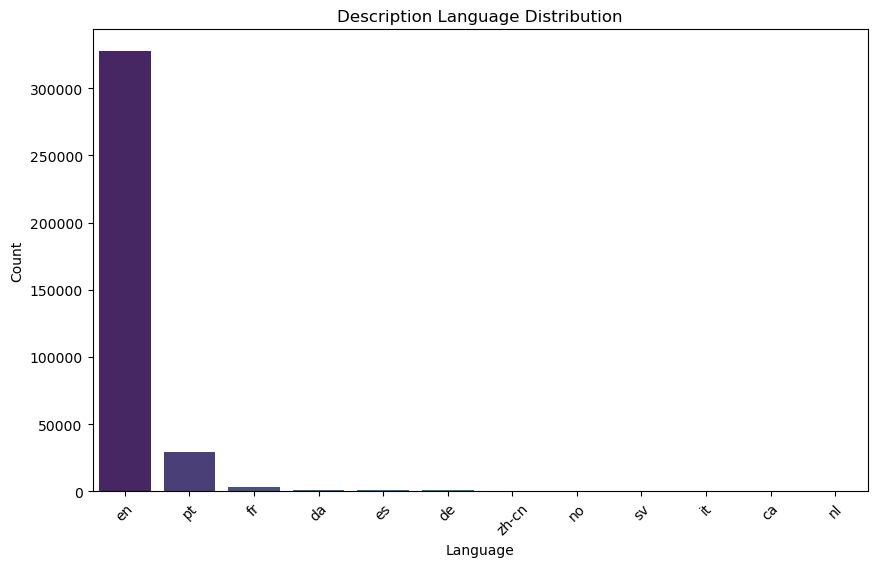

In [47]:
language_counts = merged_data["description_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

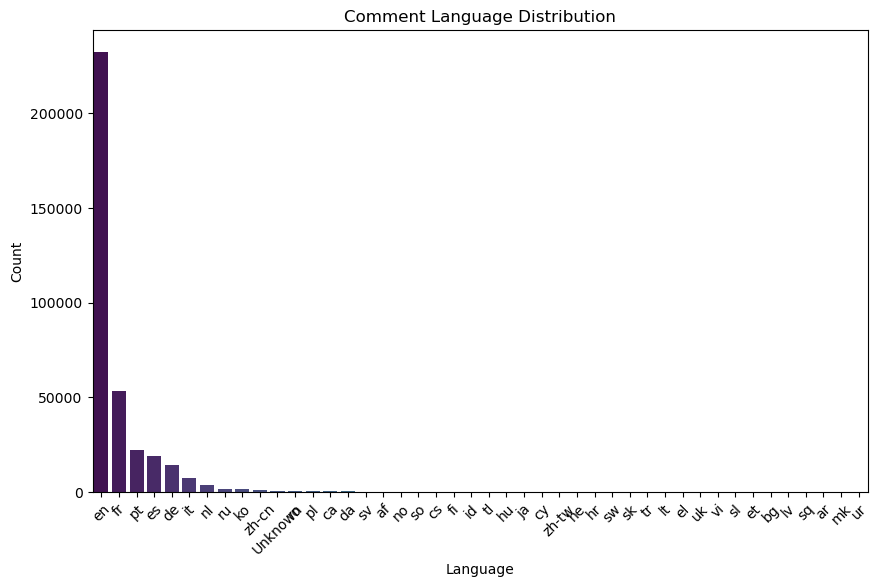

In [48]:
language_counts = merged_data["comment_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Comment Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

'en': English 
'pt': Portuguese
'fr': French
'es': Spanish
'de': German
'da': Danish
'no': Norwegian
'sv': Swedish
'it': Italian
'ca': Catalan
'zh-cn': Chinese (Simplified)
'nl': Dutch

In [49]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

test_merged_data["description_language"] = test_merged_data["description"].apply(detect_language)
test_merged_data.head()
test_merged_data["comment_language"] = test_merged_data["comments"].apply(detect_language)

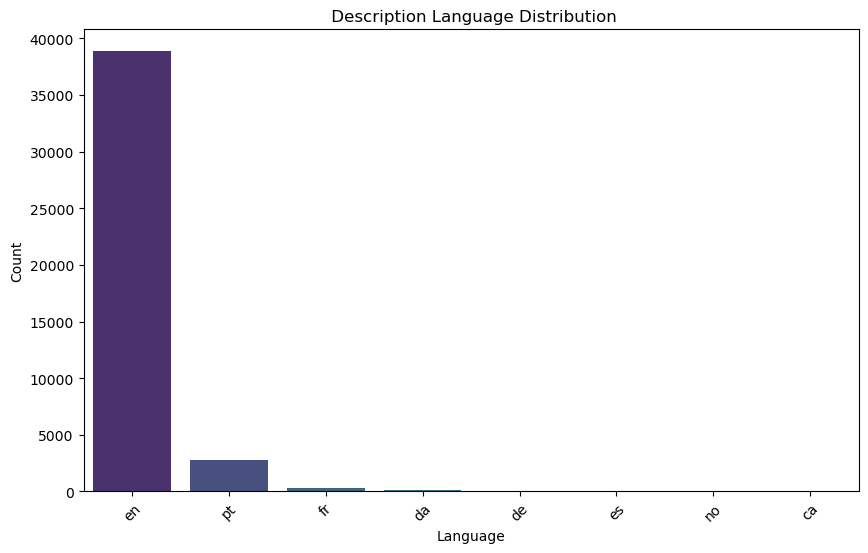

In [50]:
language_counts_test = test_merged_data["description_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_test.index, y=language_counts_test.values, palette="viridis")
plt.title(" Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [51]:
test_merged_data["description_language"].value_counts()

en    38842
pt     2807
fr      261
da      149
de        8
es        2
no        1
ca        1
Name: description_language, dtype: int64

In [52]:
test_merged_data["comment_language"].value_counts()

en         27590
fr          5933
pt          2180
es          2169
de          1746
it           849
nl           426
ko           196
ru           151
Unknown      119
zh-cn        115
ro            69
ca            66
pl            61
sv            45
da            44
af            32
fi            28
no            28
so            25
hu            24
cs            22
ja            19
cy            19
id            17
tl            16
he            13
zh-tw         12
tr             9
el             9
lt             9
hr             7
sk             5
vi             5
bg             3
ar             2
sw             2
uk             2
mk             1
et             1
kn             1
lv             1
Name: comment_language, dtype: int64

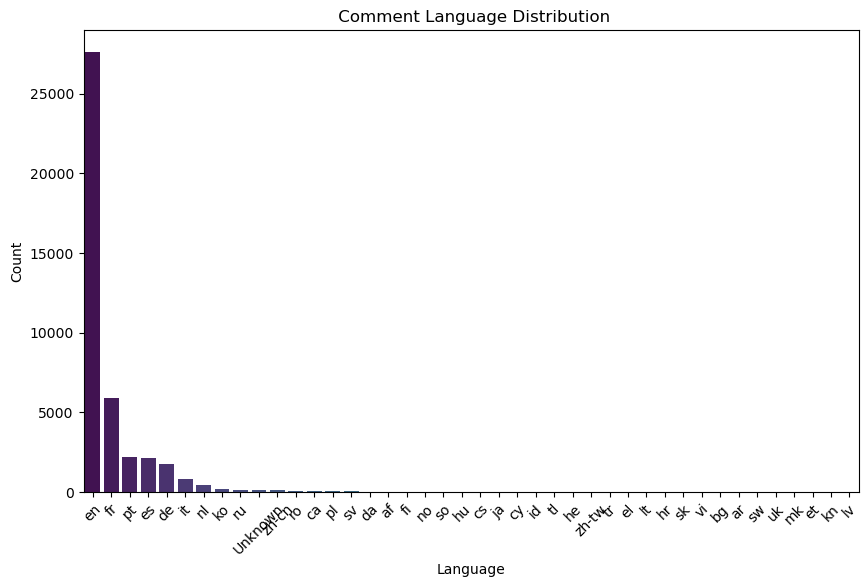

In [53]:
language_counts_test_2 = test_merged_data["comment_language"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_test_2.index, y=language_counts_test_2.values, palette="viridis")
plt.title(" Comment Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [54]:
merged_data

,comment_index,houseID,description,host_about,unlisted,comments,description_language,comment_language
0,0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...,en,en
1,1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>,en,cy
2,2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ...",en,en
3,3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...,en,de
4,4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe...",en,en
...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,The location was perfect. The apartment was ve...,en,en
363138,363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,Ana's place is exactly as described and even b...,en,en
363139,363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt
363140,363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en


In [55]:
test_merged_data

,comment_index,houseID,description,host_about,comments,description_language,comment_language
0,0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Thank you very much Antonio ! All has been per...,en,en
1,1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Very nice appartment in the old town of Lissab...,en,en
2,2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",When travelling we're looking for kids friendl...,en,en
3,3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",We've been in Lisbon in march 2013 (3 adults a...,en,en
4,4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Our host Antonio was very helpful with informa...,en,en
...,...,...,...,...,...,...,...
42066,42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Everything was fine!,en,en
42067,42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Very good located,en,en
42068,42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Appartement confortable conforme aux photos bi...,en,fr
42069,42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Très bon logement pour un week-end prolongé à ...,en,fr


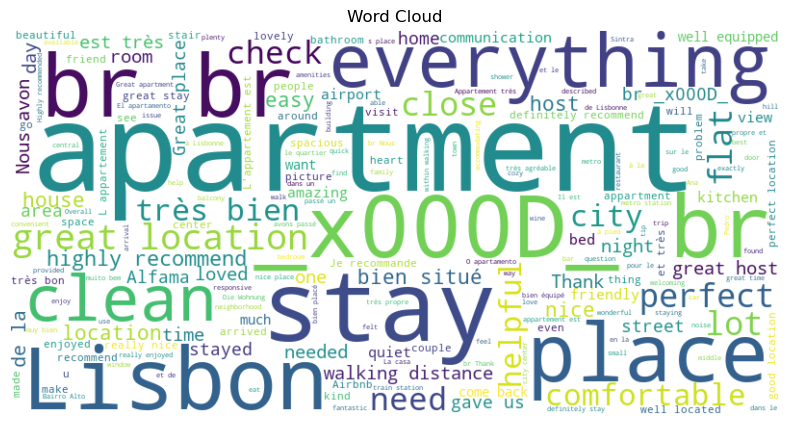

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Joining all the reviews into a single string, replacing NaNs with empty strings
all_reviews = ' '.join(str(comment) for comment in merged_data ['comments'] if pd.notna(comment))

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()


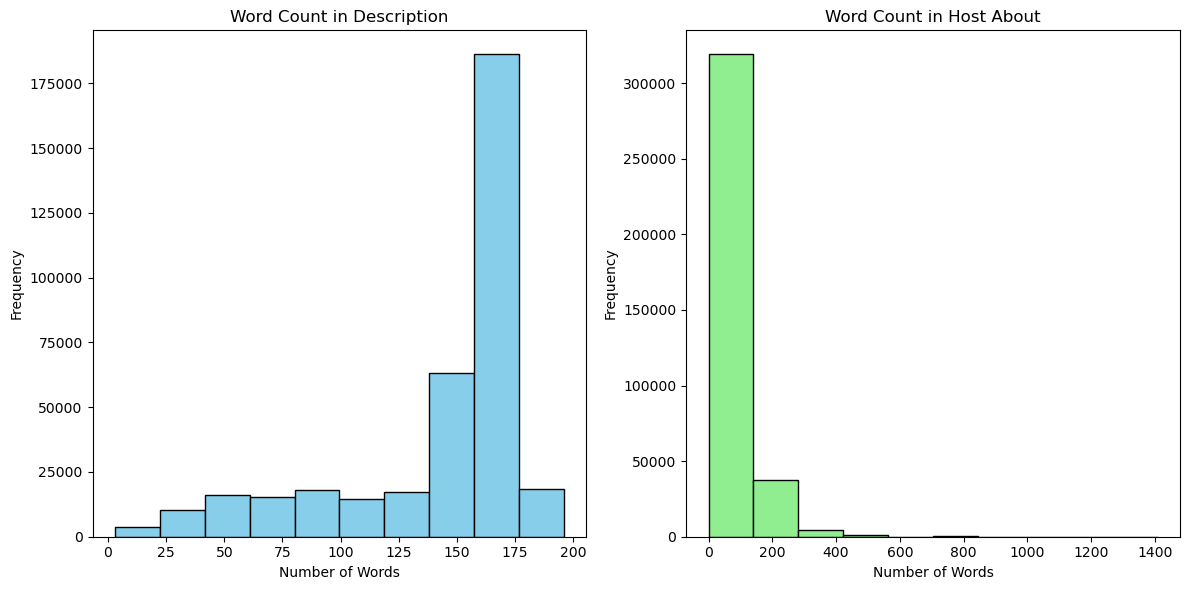

In [66]:
def count_words(text):
    return len(text.split())

# Apply word count function to each column
merged_data['description_word_count'] = merged_data['description'].apply(count_words)
merged_data['host_about_word_count'] = merged_data['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(merged_data['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(merged_data['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

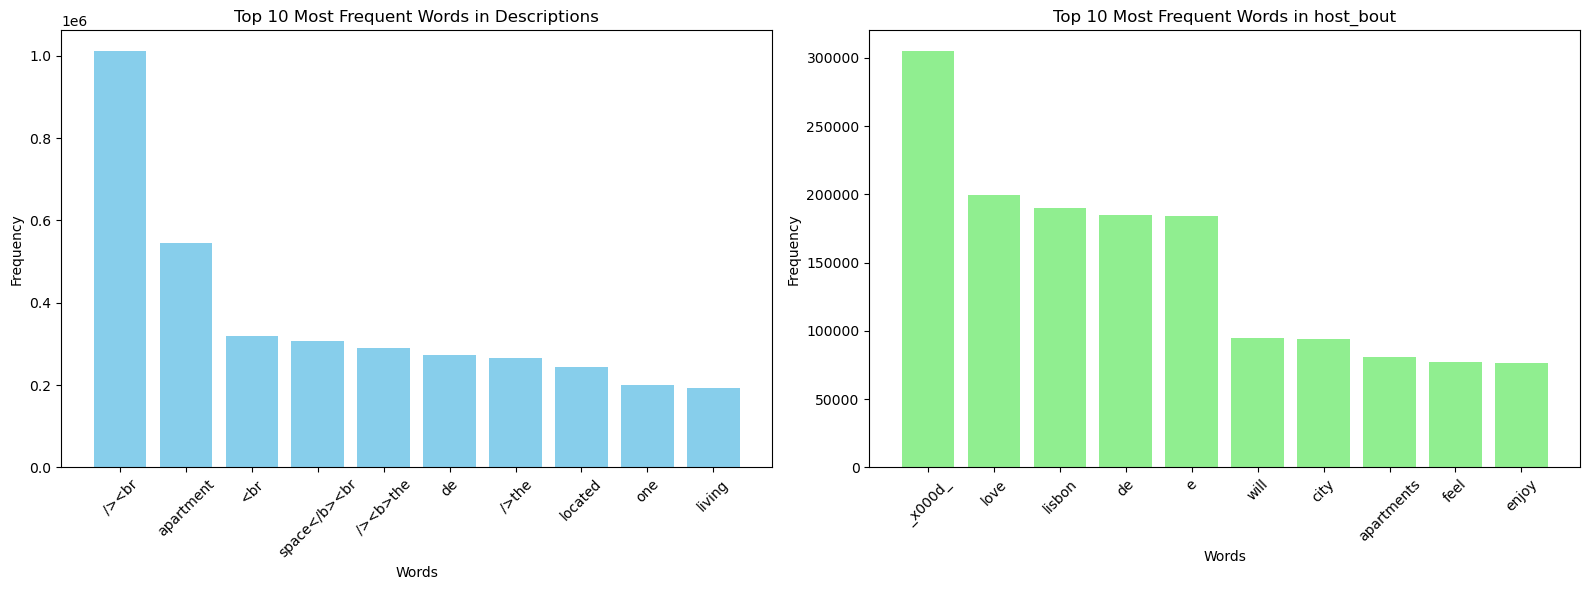

In [67]:
from collections import Counter
from wordcloud import STOPWORDS

def count_word_frequencies(text_column, num_words=10):
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(merged_data['description'])
top_words_host_about = count_word_frequencies(merged_data['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in host_bout')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()

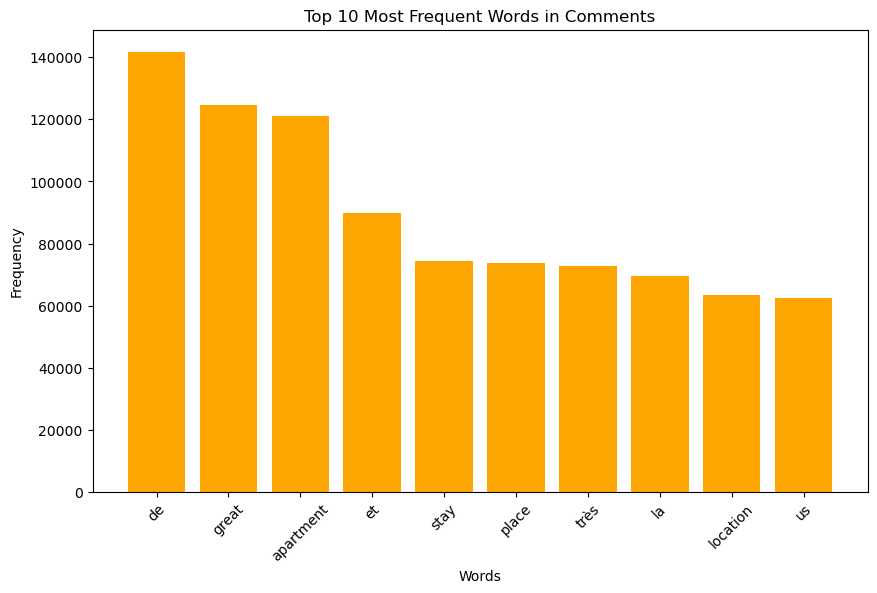

In [68]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

def count_word_frequencies(text_column, num_words=10):
    # Convert each comment to a string and concatenate them into a single text
    words = ' '.join(str(comment) for comment in text_column if pd.notna(comment)).lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'comments' column
top_words_comments = count_word_frequencies(merged_data['comments'])

# Plotting the histogram of most frequent words in 'comments' column
plt.figure(figsize=(10, 6))
plt.bar(top_words_comments.keys(), top_words_comments.values(), color='orange')
plt.title('Top 10 Most Frequent Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


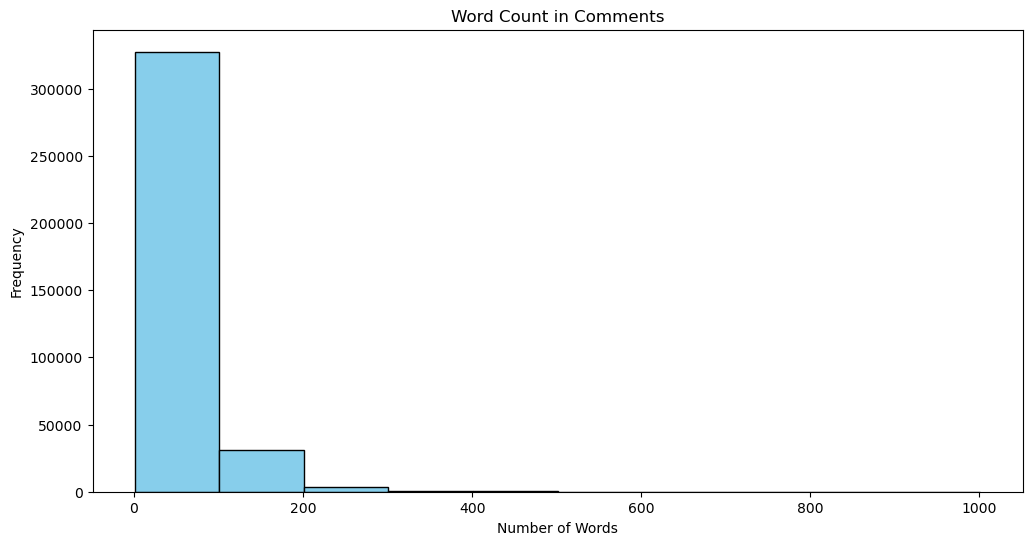

In [69]:
def count_words(text):
    # Convert text to string if it is not and handle NaN values
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Apply word count function to the 'comments' column
merged_data['comments_word_count'] = merged_data['comments'].apply(count_words)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(merged_data['comments_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [70]:
def find_unique_matches(data, column):
    # Convert column data to string type (handle NaN values gracefully)
    column_data = data[column].astype(str)
    
    # Concatenate all comments into a single string
    all_comments = ' '.join(column_data)
    
    # Define a regular expression pattern to match small words and punctuation marks
    pattern = r'\b\w{1,2}\b|[^\w\s]'
    
    # Find all matches of the pattern in the concatenated string
    matches = re.findall(pattern, all_comments)
    
    # Return unique matches using a set comprehension
    return set(matches)


unique_matches = find_unique_matches(merged_data, 'comments')

# Print the unique small words and punctuation marks
print("Unique small words and punctuation marks:")
print(list(unique_matches))


Unique small words and punctuation marks:
['🍿', '쩡쩐', '不大', '🧚', '💑', '나무', 'by', 'n', '전과', '차서', 'το', '봤음', '사실', '고생', 'eE', 'ΤΟ', 'Es', 'от', 'Du', '오고', 'Ci', '服务', 'Ju', '바와', '모든', 'x', '멀고', '벽도', '7A', '역대', '41', 's', 'UN', 'De', '슈퍼', '몸을', '않음', 'ㄴ', '수납', 'Pr', 'KY', '잡고', 'há', '안애', '22', '줌', '나온', '감수', '3m', '할거', '조븐', '1r', '일행', '관해', '：', '걸', '두어', '수왑', '힘듦', '날에', '굳', 'ці', '67', 'ZU', '그리', '뿐', '오븐', '멀지', '끊고', '드실', '집은', '단', '싼게', 'JS', '법도', '음료', '！', '3M', '살고', '여는', '93', 'Wc', '덮고', '5a', '편할', '소오', '밑에', '최고', 'Do', 'VC', '3분', '웅벌', 'g', 'Į', '양념', '超市', '빛이', '지장', '시', '했기', 'Og', '개', '1개', 'пл', 'wo', '줄', 'Η', '약한', '차', 'č', 'we', '💩', 'то', '오게', '이나', '여행', '27', '성이', '없이', 'D2', '시내', 'VI', 'Rd', '😘', '🌹', 'קר', '말이', '77', '맘', 'Yo', 'ו', 'il', '전부', '3번', '술을', 'OF', 'én', '가도', '둘다', 'ba', 'Tá', 'Bo', '앙투', '저', '負責', '풍경', '干净', '피는', '찾을', 'BT', 'ra', '길은', '뜬', 'od', 'xu', '욕조', '🌺', '环境', '6', '🤗', 'ᴗ', '성당', '등의', '나는', 'R', '

lots of emojis and small words


In [71]:
merged_data

,comment_index,houseID,description,host_about,unlisted,comments,description_language,comment_language,description_word_count,host_about_word_count,comments_word_count
0,0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...,en,en,126,4,28
1,1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>,en,cy,126,4,1
2,2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ...",en,en,126,4,261
3,3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...,en,de,126,4,81
4,4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe...",en,en,126,4,27
...,...,...,...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,The location was perfect. The apartment was ve...,en,en,150,16,131
363138,363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,Ana's place is exactly as described and even b...,en,en,150,16,80
363139,363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt,150,16,23
363140,363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en,150,16,20


In [72]:
test_merged_data

,comment_index,houseID,description,host_about,comments,description_language,comment_language
0,0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Thank you very much Antonio ! All has been per...,en,en
1,1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Very nice appartment in the old town of Lissab...,en,en
2,2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",When travelling we're looking for kids friendl...,en,en
3,3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",We've been in Lisbon in march 2013 (3 adults a...,en,en
4,4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Our host Antonio was very helpful with informa...,en,en
...,...,...,...,...,...,...,...
42066,42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Everything was fine!,en,en
42067,42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Very good located,en,en
42068,42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Appartement confortable conforme aux photos bi...,en,fr
42069,42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Très bon logement pour un week-end prolongé à ...,en,fr


In [73]:
merged_data.drop (columns = ['description_word_count', 'host_about_word_count', 'comments_word_count'], inplace = True)

In [74]:
merged_data

,comment_index,houseID,description,host_about,unlisted,comments,description_language,comment_language
0,0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...,en,en
1,1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>,en,cy
2,2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ...",en,en
3,3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...,en,de
4,4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe...",en,en
...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,The location was perfect. The apartment was ve...,en,en
363138,363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,Ana's place is exactly as described and even b...,en,en
363139,363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt
363140,363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en


In [75]:
merged_data.isna().sum()

comment_index           0
houseID                 0
description             0
host_about              0
unlisted                0
comments                0
description_language    0
comment_language        0
dtype: int64

In [76]:
test_merged_data.isna().sum()

comment_index           0
houseID                 0
description             0
host_about              0
comments                0
description_language    0
comment_language        0
dtype: int64

### emojis treatment


The demojize() function takes a string as input and returns the string with the Unicode characters replaced by their corresponding emoji names. For example, if you pass the string “😀” to the demojize() function, it will return the string “smiley face”.
https://codeforgeek.com/python-emoji-module/ emoji for python
By default, the language is English (language='en') but also supported languages are:

Spanish ('es')

Portuguese ('pt')

Italian ('it')

French ('fr')

German ('de')

Farsi/Persian ('fa')

Indonesian ('id')

Simplified Chinese ('zh')

Japanese ('ja')

Korean ('ko')

Russian ('ru')

Arabic ('ar')

Turkish ('tr')

In [77]:
import emoji
import pandas as pd

# Function to check for emojis
def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

# Function to convert emojis to text
def convert_emojis_to_text(dataframe, column_text, column_language):
    dataframe_copy = dataframe.copy()

    def convert_text(text, language):
        if has_emojis(text):
            try:
                return emoji.demojize(text, language=language)
            except:
                return emoji.demojize(text, language='en')
        else:
            return text

    # Apply the conversion to each row
    dataframe_copy[column_text] = dataframe_copy.apply(
        lambda row: convert_text(row[column_text], row[column_language]), axis=1
    )
    
    return dataframe_copy






In [78]:
merged_data_demojized = convert_emojis_to_text(merged_data, 'comments', 'comment_language')



In [80]:
merged_data_demojized

,comment_index,houseID,description,host_about,unlisted,comments,description_language,comment_language
0,0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...,en,en
1,1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>,en,cy
2,2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ...",en,en
3,3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...,en,de
4,4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe...",en,en
...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,The location was perfect. The apartment was ve...,en,en
363138,363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,Ana's place is exactly as described and even b...,en,en
363139,363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt
363140,363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en


In [81]:
merged_data_demojized= convert_emojis_to_text(merged_data_demojized, 'description', 'description_language')

In [82]:
test_merged_data_demojized = convert_emojis_to_text(test_merged_data, 'comments', 'comment_language')
test_merged_data_demojized = convert_emojis_to_text(test_merged_data_demojized, 'description', 'description_language')



checking if there's still emojis

In [83]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(merged_data_demojized, 'comments')

Comments with emojis after processing:
Index 437: 👍
Index 831: 👍
Index 1044: Wspaniałe miejsce! <br/><br/>Gospodarz, który nas obsługiwał był niezwykle uprzejmy i pomocny. Gdy potrzebowaliśmy pomocy w nocy od razu się z nami skontaktował i pomógł nam natychmiast. Mieszkanie jest nowe, czyste, schludne, a okolica urokliwa i autentyczna. Do Lizbony centralnej jest dosłownie 30 minut spacerem. Jeśli planujesz urlop w Lizbonie, koniecznie rozważ tę ofertę, bo odpoczniesz i poczujesz się zaopiekowany. <br/><br/>Dziękujemy jeszcze raz za gościnę! 🥰
Index 2384: Good👌
Index 3135: Amazing 10/10😇
Index 5307: ♥️
Index 6093: 💚
Index 6176: 👍
Index 7105: Bardzo komfortowe mieszkanie . Ładne pokoje , komfortowe łazienki . Zlokalizowane  w cichej okolicy , blisko sklepiki lokalne .<br/>Bezproblemowe zameldowanie.  Do  centrum  kilka kroków, kilka schodków i jesteś na placu Rossio i na placu Martim Monitz  z którego rusza  słynny tramwaj 28!! Niedaleko Elevador da Lavra który  pomoże  zmęczonym dostać 

In [84]:
print_comments_with_emojis(merged_data_demojized, 'description')

Comments with emojis after processing:
Index 176671: 这是位于葡萄牙里斯本辛特拉的独栋私人别墅，位于著名度假胜地辛特拉高尔夫酒店的正对面，拥有里斯本最大的球场，5分钟即可到达沙滩🏖️<br /><br /><b>License number</b><br />Exempt


In [85]:
print_comments_with_emojis(test_merged_data_demojized, 'comments')

Comments with emojis after processing:
Index 109: Communicatie was super ! We kregen altijd onmiddellijk antwoord op onze vragen en Maria stuurde ons een lange lijst met veel informatie en leuke dingen om te doen in de stad ! Toen we vertrokken heeft ze ook de taxi geregeld die ons voor de deur heeft opgepikt 👌🏻 het appartement is ideaal gelegen , rustige buurt maar vlak bij veel leuke restaurantjes en cafés. Het appartement heeft veel charme maar voelt een beetje verouderd aan. De keuken is oud en ruikt wat muf. Badkamer en slaapkamers waren wel proper ! De koer was ideaal maar ook een beetje verwilderd. Al bij al hebben we enorm genoten van ons verblijf !
Index 1445: Dit appartement is een topper! Diego heeft ons heel goed ontvangen. Het appartement heeft een hele goeie locatie. Midden in een winkelstraat en maar een minuutje stappen van de metro 😉.
Index 1570: Amazing 🌊
Index 3006: 😁
Index 4837: Very nice place !!❤️
Index 7133: Een echte aanrader! Super goede communicatie met de hos

We still have a very small percentage of emojis remaining after running the conversion function, it might be due to several factors such as unsupported emojis, non-standard emoji representations, or limitations in the emoji library. In our to prevent data leakage our decisions will be based on training data, and the test data is processed using the same rules established from the training data.



Based on the training set, we created a dictionary mapping emojis to their textual representations. Any emoji not found in the custom dictionary will be replaced with a generic placeholder :emoji:

textual representations can be found here: https://www.w3schools.com/charsets/ref_emoji_smileys.asp

https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/

In [86]:
remaining_emoji_dict = {
    '💥': ':collision:',
    '🤭': ':face_with_hand_over_mouth:',
    '☺️': ':white_smiling_face:',
    '🤩': ':star-struck:',
    '💪🏽': ':flexed_biceps_dark_skin_tone:',
    '👍': ':thumbs_up:',
    '⭐': ':star:',
    '😊': ':smiling_face_with_smiling_eyes:',
    '👌': ':ok_hand:',
    '👌🏼': ':ok_hand::light_skin_tone:',
    '👍🏻': ':thumbs_up_light_skin_tone:',
    '👍🏽': ':thumbs_up_medium-dark_skin_tone:',
    '😘': ':face_blowing_a_kiss:',
    '🤗': ':hugging_face:',
    '😉': ':winking_face:',
    '🌟': ':glowing_star:',
    '🙂': ':slightly_smiling_face:',
    '😱': ':face_screaming_in_fear:',
    '😃': ':grinning_face_with_big_eyes:',
    '❤️': ':heart:',
    '🥰': ':smiling_face_with_hearts:',
    '😇':'smiling_face_with_halo:',
    '🤙🏼': ":call_me_hand_medium-light_skin_tone:",
    '🤙': ":call_me_hand:",
    '👏': ':clapping_hands:',
    '👏🏼': ':clapping_hands::light_skin_tone:',
    '💚': ':green_heart:',
    '🙂': ':slightly_smiling_face:',
    '🔝': ':top_arrow:',
    '👌🏽': ':ok_hand::medium_skin_tone:',
    '😁': ':beaming_face_with_smiling_eyes:',
    '😂': ':face_with_tears_of_joy:',
    '🇵🇹': ':flag_Portugal:',
    '😍': ':smiling_face_with_heart-eyes:',
    '✨': ':sparkles:',
    '🙏🏻': ':folded_hands::light_skin_tone:',
    '⭐': ':star:',
    '😏': ':smirking_face:',
    '😋': ':face_savoring_food:',
    '🐝': ':honeybee:',
    '😎': ':smiling_face_with_sunglasses:',
    '💯': ':hundred_points:',
    '🎇': ':sparkler:',
    '🖤': ':black_heart:',
    '😌': ':relieved_face:',
    '🐈': ':cat:',
    '🎈': ':balons:',
    '💕': ':two_hearts:',
    '🚀': ':rocket:',
    '🌞': ':sun_with_face:',
    '🍋': ':lemon:',
    '😜':':stuck_out_tongue_winking_eye:',
    '🪨': ':rock:',
    '✌️': ':victory_hand:',
    '🔑': ':key:',
    '😃': ':grinning_face_with_big_eyes:',
    '😀':':grinning_face:',
    '✔️':':check_mark:',
    '🉐':':Japanese_acceptable_button:',
    '🤪':':zany_face:',
    '😆': ':grinning_squinting_face:',
    '🌅': ':sunrise:',
    '🌸': ':cherry_blossom:',
    '🦫': ':beaver:',
    '🎷': ':saxophone:',
    '🔥':':fire:',
    '🐐':':goat:',
    '🤝':':handshake:',
    '☹️':':frowning_face:',
    '☀️':':sun:',
    '🌱': ':seedling:',
    '✅': ':white_heavy_check_mark:',
    '🌹': ':rose:',
    '🙈': ':see-no-evil_monkey:',
    '💗': ':growing_heart:',
    '🏖️': ':beach:',
    '👌🏾': ':ok_hand::medium-dark_skin_tone:',
    '♥️': ':heart_suit:',
    '❤️': ':red_heart:',
    '🙌🏻':':raising_hands::light_skin_tone:',
    '🙌🏾':':raising_hands::medium-dark_skin_tone:',
    '☔':':umbrella_with_rain_drops:',
    '🇧🇪':':flag_Belgium:',
    '👎🏽':':thumbs_down::medium_skin_tone:',
    '👍🏼':':thumbs_up::medium-light_skin_tone:',
    '🤨':':face_with_raised_eyebrow:',
    '😭':':loudly_crying_face:',
    '👍🏾':':thumbs_up::medium-dark_skin_tone:',
    '🤟🏻':':love-you_gesture::light_skin_tone:',
    '🙁':':slightly_frowning_face:',
    '🤣':':rolling_on_the_floor_laughing:',
    '👌🏿':':ok_hand::dark_skin_tone:',
    '🇩🇰':':flag_Denmark:',
    '❣️':':heavy_heart_exclamation_mark_ornament:',
    
    
    
    
}



In [87]:
import emoji


import emoji

# Define a function to check if a text contains any emojis
def has_emojis(text):
    return any(emoji.is_emoji(char) for char in text)

# Define a function to replace the remaining emojis using a custom dictionary
def custom_replace_remaining_emojis(text, emoji_dict):
    for emj, desc in emoji_dict.items():
        text = text.replace(emj, desc)
    return text

# Define a function to replace any unknown emojis with a placeholder
def replace_unknown_emojis(text):
    return emoji.replace_emoji(text, replace=":emoji:")

# Define a function to process remaining emojis in the dataframe
def process_remaining_emojis(dataframe, column_text, emoji_dict):
    dataframe_copy = dataframe.copy()

    def convert_text_with_remaining_dict(text):
        if has_emojis(text):
            text = custom_replace_remaining_emojis(text, emoji_dict)
            text = replace_unknown_emojis(text)
            return text
        else:
            return text

    dataframe_copy[column_text] = dataframe_copy[column_text].apply(convert_text_with_remaining_dict)
    return dataframe_copy






In [88]:
merged_data_demojized = process_remaining_emojis(merged_data_demojized, 'comments', remaining_emoji_dict)
merged_data_demojized = process_remaining_emojis(merged_data_demojized, 'description', remaining_emoji_dict)
test_merged_data_demojized = process_remaining_emojis(test_merged_data_demojized, 'description', remaining_emoji_dict)
test_merged_data_demojized = process_remaining_emojis(test_merged_data_demojized, 'comments', remaining_emoji_dict)






In [89]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(merged_data_demojized, 'comments')
print_comments_with_emojis(test_merged_data_demojized, 'comments')
print_comments_with_emojis(merged_data_demojized, 'description')
print_comments_with_emojis(test_merged_data_demojized, 'description')

Comments with emojis after processing:
Comments with emojis after processing:
Comments with emojis after processing:
Comments with emojis after processing:


# Pre-Processing

In [90]:
merged_data_demojized

,comment_index,houseID,description,host_about,unlisted,comments,description_language,comment_language
0,0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...,en,en
1,1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>,en,cy
2,2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ...",en,en
3,3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...,en,de
4,4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe...",en,en
...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,The location was perfect. The apartment was ve...,en,en
363138,363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,Ana's place is exactly as described and even b...,en,en
363139,363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt
363140,363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en


In [91]:
test_merged_data_demojized

,comment_index,houseID,description,host_about,comments,description_language,comment_language
0,0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Thank you very much Antonio ! All has been per...,en,en
1,1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Very nice appartment in the old town of Lissab...,en,en
2,2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",When travelling we're looking for kids friendl...,en,en
3,3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",We've been in Lisbon in march 2013 (3 adults a...,en,en
4,4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Our host Antonio was very helpful with informa...,en,en
...,...,...,...,...,...,...,...
42066,42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Everything was fine!,en,en
42067,42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Very good located,en,en
42068,42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Appartement confortable conforme aux photos bi...,en,fr
42069,42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,Très bon logement pour un week-end prolongé à ...,en,fr


In [92]:
merged_data_demojized.drop('host_about', axis=1, inplace=True)
test_merged_data_demojized.drop('host_about', axis=1, inplace=True)

In [93]:
merged_data_demojized

,comment_index,houseID,description,unlisted,comments,description_language,comment_language
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en
1,1,1,"This is a shared mixed room in our hostel, wit...",0,good<br/>,en,cy
2,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en
3,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de
4,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en
...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en
363138,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en
363139,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt
363140,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en


remove "host_about" because it's just a description of the hos, probably not important for predicting


### Cleaning Language

In [97]:
language_counts_description = merged_data_demojized['description_language'].value_counts()

total_entries = len(merged_data_demojized)
language_percentages_description = (language_counts_description / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages_description)


Language description Percentages:
en       90.156192
pt        8.060483
fr        0.882024
da        0.382495
es        0.263533
de        0.233242
zh-cn     0.017624
no        0.001101
sv        0.001101
it        0.001101
ca        0.000551
nl        0.000551
Name: description_language, dtype: float64


In [98]:
language_counts_comments = merged_data_demojized['comment_language'].value_counts()

total_entries = len(merged_data_demojized)
language_percentages_comments = (language_counts_comments / total_entries) * 100

print("\nLanguage comment Percentages:")
print(language_percentages_comments)


Language comment Percentages:
en         63.958452
fr         14.671120
pt          6.178575
es          5.299580
de          3.913345
it          2.114875
nl          0.985565
ru          0.413062
ko          0.403148
zh-cn       0.286114
Unknown     0.240126
ro          0.221676
pl          0.163848
ca          0.157239
da          0.125571
sv          0.103265
af          0.092526
no          0.085366
so          0.075453
cs          0.057829
fi          0.056452
id          0.044611
tl          0.042132
hu          0.038002
ja          0.029740
cy          0.029465
zh-tw       0.025610
he          0.025059
hr          0.020928
sw          0.020102
sk          0.019276
tr          0.017899
lt          0.017349
el          0.013493
uk          0.012392
vi          0.012116
sl          0.010189
et          0.006058
bg          0.003855
lv          0.002754
sq          0.002478
ar          0.002478
mk          0.000551
ur          0.000275
Name: comment_language, dtype: float64


### filtering languages

To do the preprocessing steps, using NLTK package, there are only some supported languages. We'll use the one's that are supported by filtering
most supported languages



In [99]:
supported_languages_nltk = [
     'da', 'en', 'nl', 'fi', 'fr', 'de', 'hu', 'it', 
    'no', 'nl', 'pt', 'ro', 'ru', 'es', 'sv'
]

merged_data_demojized_filtered = merged_data_demojized[
    merged_data_demojized['comment_language'].isin(supported_languages_nltk) &
    merged_data_demojized['description_language'].isin(supported_languages_nltk)
]

In [100]:
merged_data_demojized_filtered["comment_language"].value_counts()

en    232220
fr     53271
pt     22429
es     19240
de     14210
it      7676
nl      3579
ru      1499
ro       805
da       456
sv       375
no       310
fi       205
hu       138
Name: comment_language, dtype: int64

In [101]:
merged_data_demojized_filtered["description_language"].value_counts()

en    321497
pt     28636
fr      3158
da      1366
es       912
de       830
no         4
sv         4
it         4
nl         2
Name: description_language, dtype: int64

In [103]:
merged_data_demojized_filtered= merged_data_demojized_filtered.copy()

In [104]:
test_merged_data_demojized_filtered = test_merged_data_demojized[
    test_merged_data_demojized['comment_language'].isin(supported_languages_nltk) &
    test_merged_data_demojized['description_language'].isin(supported_languages_nltk)
]

In [105]:
test_merged_data_demojized_filtered["comment_language"].value_counts()

en    27590
fr     5933
pt     2180
es     2169
de     1746
it      848
nl      426
ru      151
ro       69
sv       45
da       44
fi       28
no       28
hu       24
Name: comment_language, dtype: int64

In [106]:
test_merged_data_demojized_filtered

,comment_index,houseID,description,comments,description_language,comment_language
0,0,1,<b>The space</b><br />Apartment located in the...,Thank you very much Antonio ! All has been per...,en,en
1,1,1,<b>The space</b><br />Apartment located in the...,Very nice appartment in the old town of Lissab...,en,en
2,2,1,<b>The space</b><br />Apartment located in the...,When travelling we're looking for kids friendl...,en,en
3,3,1,<b>The space</b><br />Apartment located in the...,We've been in Lisbon in march 2013 (3 adults a...,en,en
4,4,1,<b>The space</b><br />Apartment located in the...,Our host Antonio was very helpful with informa...,en,en
...,...,...,...,...,...,...
42066,42081,695,Apartment with terrace located in the heart of...,Everything was fine!,en,en
42067,42082,695,Apartment with terrace located in the heart of...,Very good located,en,en
42068,42083,695,Apartment with terrace located in the heart of...,Appartement confortable conforme aux photos bi...,en,fr
42069,42084,695,Apartment with terrace located in the heart of...,Très bon logement pour un week-end prolongé à ...,en,fr


# Cleaning data 

In [893]:
import re
from tqdm import tqdm
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from unidecode import unidecode
import nltk

In [107]:
merged_data_clean = merged_data_demojized_filtered.copy()
test_clean = test_merged_data_demojized_filtered.copy()

In [108]:
merged_data_clean

,comment_index,houseID,description,unlisted,comments,description_language,comment_language
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en
2,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en
3,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de
4,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en
5,5,1,"This is a shared mixed room in our hostel, wit...",0,Our stay in Lisbon Tip Hostel was very good. T...,en,en
...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en
363138,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en
363139,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt
363140,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en


In [109]:
test_clean


,comment_index,houseID,description,comments,description_language,comment_language
0,0,1,<b>The space</b><br />Apartment located in the...,Thank you very much Antonio ! All has been per...,en,en
1,1,1,<b>The space</b><br />Apartment located in the...,Very nice appartment in the old town of Lissab...,en,en
2,2,1,<b>The space</b><br />Apartment located in the...,When travelling we're looking for kids friendl...,en,en
3,3,1,<b>The space</b><br />Apartment located in the...,We've been in Lisbon in march 2013 (3 adults a...,en,en
4,4,1,<b>The space</b><br />Apartment located in the...,Our host Antonio was very helpful with informa...,en,en
...,...,...,...,...,...,...
42066,42081,695,Apartment with terrace located in the heart of...,Everything was fine!,en,en
42067,42082,695,Apartment with terrace located in the heart of...,Very good located,en,en
42068,42083,695,Apartment with terrace located in the heart of...,Appartement confortable conforme aux photos bi...,en,fr
42069,42084,695,Apartment with terrace located in the heart of...,Très bon logement pour un week-end prolongé à ...,en,fr


### Removing accents

In [110]:
accent_mapping = {
    'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'ae', 'ā': 'a',
    'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e', 'ē': 'e',
    'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
    'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o', 'œ': 'oe',
    'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u', 'ū': 'u', 'ů': 'u',
    'ç': 'c',
    'ñ': 'n',
    'ś': 's', 'š': 's', 'ß': 'ss',
    'ź': 'z', 'ż': 'z', 'ž': 'z'
}

In [111]:
def remove_accents(text, mapping):
    return ''.join(mapping.get(char, char) for char in text)

In [112]:
merged_data_clean['clean_comments'] = merged_data_clean['comments'].apply(lambda x: remove_accents(x, accent_mapping))
merged_data_clean['clean_description'] = merged_data_clean['description'].apply(lambda x: remove_accents(x, accent_mapping))

test_clean['clean_comments'] = test_clean['comments'].apply(lambda x: remove_accents(x, accent_mapping))
test_clean['clean_description'] = test_clean['description'].apply(lambda x: remove_accents(x, accent_mapping))

In [113]:
merged_data_clean 

,comment_index,houseID,description,unlisted,comments,description_language,comment_language,clean_comments,clean_description
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en,this is a very cozy and comfortable house to s...,"This is a shared mixed room in our hostel, wit..."
2,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en,"My first hostel experience, and all I have to ...","This is a shared mixed room in our hostel, wit..."
3,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de,Das Hostel war neu und deshalb funktionierte a...,"This is a shared mixed room in our hostel, wit..."
4,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en,"It was fine for a dorm, but I think for the pe...","This is a shared mixed room in our hostel, wit..."
5,5,1,"This is a shared mixed room in our hostel, wit...",0,Our stay in Lisbon Tip Hostel was very good. T...,en,en,Our stay in Lisbon Tip Hostel was very good. T...,"This is a shared mixed room in our hostel, wit..."
...,...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en,The location was perfect. The apartment was ve...,These apartments are very well located in a go...
363138,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en,Ana's place is exactly as described and even b...,These apartments are very well located in a go...
363139,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt,A Ana foi muito atenciosa e preocupou se com o...,These apartments are very well located in a go...
363140,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en,No wifi nor answer. <br/>The wifi can’t be con...,These apartments are very well located in a go...


In [114]:
test_clean

,comment_index,houseID,description,comments,description_language,comment_language,clean_comments,clean_description
0,0,1,<b>The space</b><br />Apartment located in the...,Thank you very much Antonio ! All has been per...,en,en,Thank you very much Antonio ! All has been per...,<b>The space</b><br />Apartment located in the...
1,1,1,<b>The space</b><br />Apartment located in the...,Very nice appartment in the old town of Lissab...,en,en,Very nice appartment in the old town of Lissab...,<b>The space</b><br />Apartment located in the...
2,2,1,<b>The space</b><br />Apartment located in the...,When travelling we're looking for kids friendl...,en,en,When travelling we're looking for kids friendl...,<b>The space</b><br />Apartment located in the...
3,3,1,<b>The space</b><br />Apartment located in the...,We've been in Lisbon in march 2013 (3 adults a...,en,en,We've been in Lisbon in march 2013 (3 adults a...,<b>The space</b><br />Apartment located in the...
4,4,1,<b>The space</b><br />Apartment located in the...,Our host Antonio was very helpful with informa...,en,en,Our host Antonio was very helpful with informa...,<b>The space</b><br />Apartment located in the...
...,...,...,...,...,...,...,...,...
42066,42081,695,Apartment with terrace located in the heart of...,Everything was fine!,en,en,Everything was fine!,Apartment with terrace located in the heart of...
42067,42082,695,Apartment with terrace located in the heart of...,Very good located,en,en,Very good located,Apartment with terrace located in the heart of...
42068,42083,695,Apartment with terrace located in the heart of...,Appartement confortable conforme aux photos bi...,en,fr,Appartement confortable conforme aux photos bi...,Apartment with terrace located in the heart of...
42069,42084,695,Apartment with terrace located in the heart of...,Très bon logement pour un week-end prolongé à ...,en,fr,Tres bon logement pour un week-end prolonge a ...,Apartment with terrace located in the heart of...


### Lower Case

In [115]:
merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].str.lower()
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].str.lower()



test_clean['clean_comments'] = test_clean['clean_comments'].str.lower()
test_clean['clean_description'] = test_clean['clean_description'].str.lower()

In [116]:
merged_data_clean

,comment_index,houseID,description,unlisted,comments,description_language,comment_language,clean_comments,clean_description
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en,this is a very cozy and comfortable house to s...,"this is a shared mixed room in our hostel, wit..."
2,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en,"my first hostel experience, and all i have to ...","this is a shared mixed room in our hostel, wit..."
3,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de,das hostel war neu und deshalb funktionierte a...,"this is a shared mixed room in our hostel, wit..."
4,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en,"it was fine for a dorm, but i think for the pe...","this is a shared mixed room in our hostel, wit..."
5,5,1,"This is a shared mixed room in our hostel, wit...",0,Our stay in Lisbon Tip Hostel was very good. T...,en,en,our stay in lisbon tip hostel was very good. t...,"this is a shared mixed room in our hostel, wit..."
...,...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en,the location was perfect. the apartment was ve...,these apartments are very well located in a go...
363138,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en,ana's place is exactly as described and even b...,these apartments are very well located in a go...
363139,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt,a ana foi muito atenciosa e preocupou se com o...,these apartments are very well located in a go...
363140,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en,no wifi nor answer. <br/>the wifi can’t be con...,these apartments are very well located in a go...


### Remove HTML tags

In [117]:
def remove_html_tags(text):
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub("<br />", " ", text)
    return text

In [118]:
merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_html_tags)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_html_tags)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_html_tags)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_html_tags)

### URL

In [119]:
import re

def remove_urls(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    return text

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_urls)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_urls)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_urls)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_urls)

### Numbers

In [120]:
def replace_numbers(text):
    number_pattern = r'\b\d+\b'
    return re.sub(number_pattern, 'number', text)

In [121]:
merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(replace_numbers)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(replace_numbers)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(replace_numbers)
test_clean['clean_description'] = test_clean['clean_description'].apply(replace_numbers)

In [123]:
merged_data_clean

,comment_index,houseID,description,unlisted,comments,description_language,comment_language,clean_comments,clean_description
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en,this is a very cozy and comfortable house to s...,"this is a shared mixed room in our hostel, wit..."
2,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en,"my first hostel experience, and all i have to ...","this is a shared mixed room in our hostel, wit..."
3,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de,das hostel war neu und deshalb funktionierte a...,"this is a shared mixed room in our hostel, wit..."
4,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en,"it was fine for a dorm, but i think for the pe...","this is a shared mixed room in our hostel, wit..."
5,5,1,"This is a shared mixed room in our hostel, wit...",0,Our stay in Lisbon Tip Hostel was very good. T...,en,en,our stay in lisbon tip hostel was very good. t...,"this is a shared mixed room in our hostel, wit..."
...,...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en,the location was perfect. the apartment was ve...,these apartments are very well located in a go...
363138,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en,ana's place is exactly as described and even b...,these apartments are very well located in a go...
363139,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt,a ana foi muito atenciosa e preocupou se com o...,these apartments are very well located in a go...
363140,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en,no wifi nor answer. the wifi can’t be connect...,these apartments are very well located in a go...


### Remove non alphabetic characters 

In [124]:
def remove_non_alphabetic(text):
    return re.sub(r'[^a-zA-Z\s]', ' ', text)

In [125]:
merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_non_alphabetic)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_non_alphabetic)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_non_alphabetic)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_non_alphabetic)

In [127]:
merged_data_clean

,comment_index,houseID,description,unlisted,comments,description_language,comment_language,clean_comments,clean_description
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en,this is a very cozy and comfortable house to s...,this is a shared mixed room in our hostel wit...
2,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en,my first hostel experience and all i have to ...,this is a shared mixed room in our hostel wit...
3,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de,das hostel war neu und deshalb funktionierte a...,this is a shared mixed room in our hostel wit...
4,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en,it was fine for a dorm but i think for the pe...,this is a shared mixed room in our hostel wit...
5,5,1,"This is a shared mixed room in our hostel, wit...",0,Our stay in Lisbon Tip Hostel was very good. T...,en,en,our stay in lisbon tip hostel was very good t...,this is a shared mixed room in our hostel wit...
...,...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en,the location was perfect the apartment was ve...,these apartments are very well located in a go...
363138,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en,ana s place is exactly as described and even b...,these apartments are very well located in a go...
363139,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt,a ana foi muito atenciosa e preocupou se com o...,these apartments are very well located in a go...
363140,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en,no wifi nor answer the wifi can t be connect...,these apartments are very well located in a go...


### Stopwords

In [131]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatrizsantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

french_stopwords = set(stopwords.words('french'))

def remove_french_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in french_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_french_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_french_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_french_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_french_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatrizsantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
german_stopwords = set(stopwords.words('german'))

def remove_german_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in german_stopwords]
    return ' '.join(filtered_words)


merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_german_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_german_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_german_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_german_stopwords)


In [134]:


danish_stopwords = set(stopwords.words('danish'))

def remove_danish_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in danish_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_danish_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_danish_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_danish_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_danish_stopwords)


In [135]:
dutch_stopwords = set(stopwords.words('dutch'))

def remove_dutch_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in dutch_stopwords]
    return ' '.join(filtered_words)

# Apply the function to the text
merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_dutch_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_dutch_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_dutch_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_dutch_stopwords)

finnish_stopwords = set(stopwords.words('finnish'))

def remove_finnish_stopwords(text): 
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in finnish_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_finnish_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_finnish_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_finnish_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_finnish_stopwords)

hungarian_stopwords = set(stopwords.words('hungarian'))

def remove_hungarian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in hungarian_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_hungarian_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_hungarian_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_hungarian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_hungarian_stopwords)

italian_stopwords = set(stopwords.words('italian'))

def remove_italian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in italian_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_italian_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_italian_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_italian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_italian_stopwords)


norwegian_stopwords = set(stopwords.words('norwegian'))

def remove_norwegian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in norwegian_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_norwegian_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_norwegian_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_norwegian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_norwegian_stopwords)

portuguese_stopwords = set(stopwords.words('portuguese'))

def remove_portuguese_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in portuguese_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_portuguese_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_portuguese_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_portuguese_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_portuguese_stopwords)


romanian_stopwords = set(stopwords.words('romanian'))

def remove_romanian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in romanian_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_romanian_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_romanian_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_romanian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_romanian_stopwords)

russian_stopwords = set(stopwords.words('russian'))

def remove_russian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in russian_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_russian_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_russian_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_russian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_russian_stopwords)

spanish_stopwords = set(stopwords.words('spanish'))

def remove_spanish_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in spanish_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_spanish_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_spanish_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_spanish_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_spanish_stopwords)

swedish_stopwords = set(stopwords.words('swedish'))

def remove_swedish_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in swedish_stopwords]
    return ' '.join(filtered_words)

merged_data_clean['clean_comments'] = merged_data_clean['clean_comments'].apply(remove_swedish_stopwords)
merged_data_clean['clean_description'] = merged_data_clean['clean_description'].apply(remove_swedish_stopwords)

test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_swedish_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_swedish_stopwords)

merged_data_clean

,comment_index,houseID,description,unlisted,comments,description_language,comment_language,clean_comments,clean_description
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en,cozy comfortable house stay never worry safety...,shared mixed room hostel shared bathroom locat...
2,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en,first hostel experience say pretty hard beat p...,shared mixed room hostel shared bathroom locat...
3,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de,hostel neu deshalb funktionierte tadellos schn...,shared mixed room hostel shared bathroom locat...
4,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en,fine dorm think people staying far less bathro...,shared mixed room hostel shared bathroom locat...
5,5,1,"This is a shared mixed room in our hostel, wit...",0,Our stay in Lisbon Tip Hostel was very good. T...,en,en,stay lisbon tip hostel good mixed rooms well c...,shared mixed room hostel shared bathroom locat...
...,...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en,location perfect apartment close airport right...,apartments well located good neighborhood cent...
363138,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en,ana place exactly described even better easy c...,apartments well located good neighborhood cent...
363139,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt,ana atenciosa preocupou conforto toda estadia ...,apartments well located good neighborhood cent...
363140,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en,wifi answer wifi connected nobody answered lit...,apartments well located good neighborhood cent...


### Lemmatization

In [136]:
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Load SpaCy models
spacy_lemmatizers = {
    'en': spacy.load('en_core_web_sm'),
    'es': spacy.load('es_core_news_sm'),
    'fr': spacy.load('fr_core_news_sm'),
    'de': spacy.load('de_core_news_sm'),
    'it': spacy.load('it_core_news_sm'),
    'nl': spacy.load('nl_core_news_sm'),
    'pt': spacy.load('pt_core_news_sm'),
    'ru': spacy.load('ru_core_news_sm'),
    'sv': spacy.load('sv_core_news_sm'),
    'fi': spacy.load('fi_core_news_sm'),
    'da': spacy.load('da_core_news_sm'),
    'ro': spacy.load('ro_core_news_sm'),
    'no': spacy.load('nb_core_news_sm'),
    'xx': spacy.load('xx_ent_wiki_sm')   
}


nltk_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text, language='en'):
    if language == 'en':
        return ' '.join([nltk_lemmatizer.lemmatize(word) for word in text.split()])
    elif language in spacy_lemmatizers:
        doc = spacy_lemmatizers[language](text)
        return ' '.join([token.lemma_ for token in doc])
    else:
        doc = spacy_lemmatizers['xx'](text)  #  multilingual model
        return ' '.join([token.lemma_ for token in doc])





# Apply lemmatization
merged_data_clean['clean_comments'] = merged_data_clean.apply(lambda row: lemmatize_text(row['clean_comments'], row['comment_language']), axis=1)
merged_data_clean['clean_description'] = merged_data_clean.apply(lambda row: lemmatize_text(row['clean_description'], row['description_language']), axis=1)

test_clean['clean_comments'] = test_clean.apply(lambda row: lemmatize_text(row['clean_comments'], row['comment_language']), axis=1)
test_clean['clean_description'] = test_clean.apply(lambda row: lemmatize_text(row['clean_description'], row['description_language']), axis=1)


In [137]:
merged_data_clean

,comment_index,houseID,description,unlisted,comments,description_language,comment_language,clean_comments,clean_description
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en,cozy comfortable house stay never worry safety...,shared mixed room hostel shared bathroom locat...
2,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en,first hostel experience say pretty hard beat p...,shared mixed room hostel shared bathroom locat...
3,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de,hostel neu deshalb funktionieren tadellos schn...,shared mixed room hostel shared bathroom locat...
4,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en,fine dorm think people staying far le bathroom...,shared mixed room hostel shared bathroom locat...
5,5,1,"This is a shared mixed room in our hostel, wit...",0,Our stay in Lisbon Tip Hostel was very good. T...,en,en,stay lisbon tip hostel good mixed room well cl...,shared mixed room hostel shared bathroom locat...
...,...,...,...,...,...,...,...,...,...
363137,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en,location perfect apartment close airport right...,apartment well located good neighborhood cente...
363138,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en,ana place exactly described even better easy c...,apartment well located good neighborhood cente...
363139,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt,ana atencioso preocupar conforto todo estadia ...,apartment well located good neighborhood cente...
363140,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en,wifi answer wifi connected nobody answered lit...,apartment well located good neighborhood cente...


In [138]:
merged_data_clean.isna().sum()

comment_index           0
houseID                 0
description             0
unlisted                0
comments                0
description_language    0
comment_language        0
clean_comments          0
clean_description       0
dtype: int64

In [139]:
merged_data_clean.to_csv('merged_data_preprocessed.csv', index=False)
test_clean.to_csv('test_preprocessed.csv', index=False)


# Data Visualization after preprocessing

In [2]:
import pandas as pd

In [166]:
train = pd.read_csv('merged_data_preprocessed.csv', delimiter=',')
test = pd.read_csv('test_preprocessed.csv', delimiter=',')


In [167]:
train

,comment_index,houseID,description,unlisted,comments,description_language,comment_language,clean_comments,clean_description
0,0,1,"This is a shared mixed room in our hostel, wit...",0,this is a very cozy and comfortable house to s...,en,en,cozy comfortable house stay never worry safety...,shared mixed room hostel shared bathroom locat...
1,2,1,"This is a shared mixed room in our hostel, wit...",0,"My first hostel experience, and all I have to ...",en,en,first hostel experience say pretty hard beat p...,shared mixed room hostel shared bathroom locat...
2,3,1,"This is a shared mixed room in our hostel, wit...",0,Das Hostel war neu und deshalb funktionierte a...,en,de,hostel neu deshalb funktionieren tadellos schn...,shared mixed room hostel shared bathroom locat...
3,4,1,"This is a shared mixed room in our hostel, wit...",0,"It was fine for a dorm, but I think for the pe...",en,en,fine dorm think people staying far le bathroom...,shared mixed room hostel shared bathroom locat...
4,5,1,"This is a shared mixed room in our hostel, wit...",0,Our stay in Lisbon Tip Hostel was very good. T...,en,en,stay lisbon tip hostel good mixed room well cl...,shared mixed room hostel shared bathroom locat...
...,...,...,...,...,...,...,...,...,...
356408,363279,6248,These apartments are very well located in a go...,0,The location was perfect. The apartment was ve...,en,en,location perfect apartment close airport right...,apartment well located good neighborhood cente...
356409,363280,6248,These apartments are very well located in a go...,0,Ana's place is exactly as described and even b...,en,en,ana place exactly described even better easy c...,apartment well located good neighborhood cente...
356410,363281,6248,These apartments are very well located in a go...,0,A Ana foi muito atenciosa e preocupou se com o...,en,pt,ana atencioso preocupar conforto todo estadia ...,apartment well located good neighborhood cente...
356411,363282,6248,These apartments are very well located in a go...,0,No wifi nor answer. <br/>The wifi can’t be con...,en,en,wifi answer wifi connected nobody answered lit...,apartment well located good neighborhood cente...


In [168]:
grouped_df = train.groupby('houseID').agg(lambda x: ' '.join(set(x.astype(str)))).reset_index()

In [169]:
grouped_df.drop(columns = ['comment_index', 'description', 'comments', 'description_language'], inplace = True)

In [170]:
grouped_df.drop(columns = [ 'comment_language'], inplace = True)

In [171]:
grouped_df

,houseID,unlisted,clean_comments,clean_description
0,1,0,property absolutely clean stylish exactly show...,shared mixed room hostel shared bathroom locat...
1,2,1,Comment,espaco ficar perto parque eduardo Vii saldanha...
2,3,1,Comment,trafaria house cozy familiar villa facility ne...
3,4,0,Comment,apartamento charmoso chiar largo Carmo travess...
4,5,0,tre bel appartemer magnifique voir plage mer t...,joli appartemer bordure mer number pied plage ...
...,...,...,...,...
6233,6244,0,apartment well presented photo description vas...,studio number new well decorated cozy apartmen...
6234,6245,0,clean well equipped apartment stay lisbon alth...,lisbon meet cosmopolitan industrial one bedroo...
6235,6246,1,logement idealement situer souhaiter visiter l...,license number exempt
6236,6247,0,great place stay lisbon apartment transformed ...,campo pequeno prestige classy top quality apar...


In [172]:
grouped_df['comments_and_description'] = grouped_df['clean_comments'] + ' ' + grouped_df['clean_description']

In [163]:
grouped_df

,houseID,unlisted,clean_comments,clean_description,comments_and_description
0,1,0,property absolutely clean stylish exactly show...,shared mixed room hostel shared bathroom locat...,property absolutely clean stylish exactly show...
1,2,1,Comment,espaco ficar perto parque eduardo Vii saldanha...,Comment espaco ficar perto parque eduardo Vii ...
2,3,1,Comment,trafaria house cozy familiar villa facility ne...,Comment trafaria house cozy familiar villa fac...
3,4,0,Comment,apartamento charmoso chiar largo Carmo travess...,Comment apartamento charmoso chiar largo Carmo...
4,5,0,tre bel appartemer magnifique voir plage mer t...,joli appartemer bordure mer number pied plage ...,tre bel appartemer magnifique voir plage mer t...
...,...,...,...,...,...
6233,6244,0,apartment well presented photo description vas...,studio number new well decorated cozy apartmen...,apartment well presented photo description vas...
6234,6245,0,clean well equipped apartment stay lisbon alth...,lisbon meet cosmopolitan industrial one bedroo...,clean well equipped apartment stay lisbon alth...
6235,6246,1,logement idealement situer souhaiter visiter l...,license number exempt,logement idealement situer souhaiter visiter l...
6236,6247,0,great place stay lisbon apartment transformed ...,campo pequeno prestige classy top quality apar...,great place stay lisbon apartment transformed ...


In [173]:
grouped_df = grouped_df.apply(lambda x: x.astype(str).str.lower())
grouped_df


,houseID,unlisted,clean_comments,clean_description,comments_and_description
0,1,0,property absolutely clean stylish exactly show...,shared mixed room hostel shared bathroom locat...,property absolutely clean stylish exactly show...
1,2,1,comment,espaco ficar perto parque eduardo vii saldanha...,comment espaco ficar perto parque eduardo vii ...
2,3,1,comment,trafaria house cozy familiar villa facility ne...,comment trafaria house cozy familiar villa fac...
3,4,0,comment,apartamento charmoso chiar largo carmo travess...,comment apartamento charmoso chiar largo carmo...
4,5,0,tre bel appartemer magnifique voir plage mer t...,joli appartemer bordure mer number pied plage ...,tre bel appartemer magnifique voir plage mer t...
...,...,...,...,...,...
6233,6244,0,apartment well presented photo description vas...,studio number new well decorated cozy apartmen...,apartment well presented photo description vas...
6234,6245,0,clean well equipped apartment stay lisbon alth...,lisbon meet cosmopolitan industrial one bedroo...,clean well equipped apartment stay lisbon alth...
6235,6246,1,logement idealement situer souhaiter visiter l...,license number exempt,logement idealement situer souhaiter visiter l...
6236,6247,0,great place stay lisbon apartment transformed ...,campo pequeno prestige classy top quality apar...,great place stay lisbon apartment transformed ...


In [174]:
test_df= test.groupby('houseID').agg(lambda x: ' '.join(set(x.astype(str)))).reset_index()

In [175]:
test_df

,houseID,comment_index,description,comments,description_language,comment_language,clean_comments,clean_description
0,1,33 83 103 36 40 31 61 106 12 73 109 74 42 80 6...,<b>The space</b><br />Apartment located in the...,"Thank you so much for everything, perfect loca...",en,es it de en nl pt fr,everything great antonio mother margarida good...,space apartment located historic center lisbon...
1,2,132 135 130 134 133 129 128 125 131 127 126,"IMPORTANT: In response to COVID-19, this prope...",El departamento es tal cual aparece en las fot...,en,en es fr pt,flat clean well maintained nice touch master b...,important response covid number property exten...
2,3,136,"Bright, beautiful, and spacious. This four-bed...",no_comment,en,it,Comment,bright beautiful spacious four bedroom apartme...
3,4,143 144 145 141 151 147 152 153 139 150 140 14...,Charming Apartment Close to the Bay of Cascais...,Apartamento muy bonito y bien ubicado. Cerca d...,en,en nl es fr,posicion apartamento poder mejor cerca amable ...,charming apartment close bay cascais number be...
4,5,180 178 186 192 182 173 201 169 184 166 188 15...,"Se procura umas férias perto da praia, casino ...","Nice place, quiet area, Helena is available. E...",pt,es it de nl en pt fr,logement tre confortable malgre petit salle ba...,procurar um feria perto praia casino outro atr...
...,...,...,...,...,...,...,...,...
689,691,41766 41827 41784 41850 41817 41754 41755 4182...,Brand new apartment in a XVIcentury building! ...,Maria is a great host! She is very responsive ...,en,es it de en nl no pt fr,maria place located bohemian part lisbon good ...,brand new apartment xvicentury building amazin...
690,692,41859 41917 41962 41920 41944 41931 41884 4189...,Located in one of the most iconic streets of L...,Schöne Wohnung mitten in der Innenstadt. Klein...,en,it de en ru pt fr,clean modern accommodation heart city convenie...,located one iconic street lisbon enjoy charmin...
691,693,41963,<b>The space</b><br />STUDIO <br /> <br />The ...,no_comment,en,it,Comment,space studio building renovated number studio ...
692,694,41977 42010 41978 42051 42042 41969 42043 4205...,Charming apartment with an overwelming view ov...,Très joli appartement au calme et bien situé d...,en,es it de en ru pt fr,central location close rossio station easy acc...,charming apartment overwelming view several di...


In [176]:
test_df.drop(columns = ['comment_index', 'description', 'comments', 'description_language', 'comment_language'], inplace = True)

In [177]:
test_df['comments_and_description'] = test_df['clean_comments'] + ' ' + grouped_df['clean_description']

In [178]:
test_df

,houseID,clean_comments,clean_description,comments_and_description
0,1,everything great antonio mother margarida good...,space apartment located historic center lisbon...,everything great antonio mother margarida good...
1,2,flat clean well maintained nice touch master b...,important response covid number property exten...,flat clean well maintained nice touch master b...
2,3,Comment,bright beautiful spacious four bedroom apartme...,Comment trafaria house cozy familiar villa fac...
3,4,posicion apartamento poder mejor cerca amable ...,charming apartment close bay cascais number be...,posicion apartamento poder mejor cerca amable ...
4,5,logement tre confortable malgre petit salle ba...,procurar um feria perto praia casino outro atr...,logement tre confortable malgre petit salle ba...
...,...,...,...,...
689,691,maria place located bohemian part lisbon good ...,brand new apartment xvicentury building amazin...,maria place located bohemian part lisbon good ...
690,692,clean modern accommodation heart city convenie...,located one iconic street lisbon enjoy charmin...,clean modern accommodation heart city convenie...
691,693,Comment,space studio building renovated number studio ...,Comment confortable well equiped flat tipical ...
692,694,central location close rossio station easy acc...,charming apartment overwelming view several di...,central location close rossio station easy acc...


In [180]:
print(grouped_df.shape)
print(test_df.shape)

(6238, 5)
(694, 4)


In [181]:
grouped_df.isna().sum()

houseID                     0
unlisted                    0
clean_comments              0
clean_description           0
comments_and_description    0
dtype: int64

In [182]:
test_df.isna().sum()

houseID                     0
clean_comments              0
clean_description           0
comments_and_description    0
dtype: int64

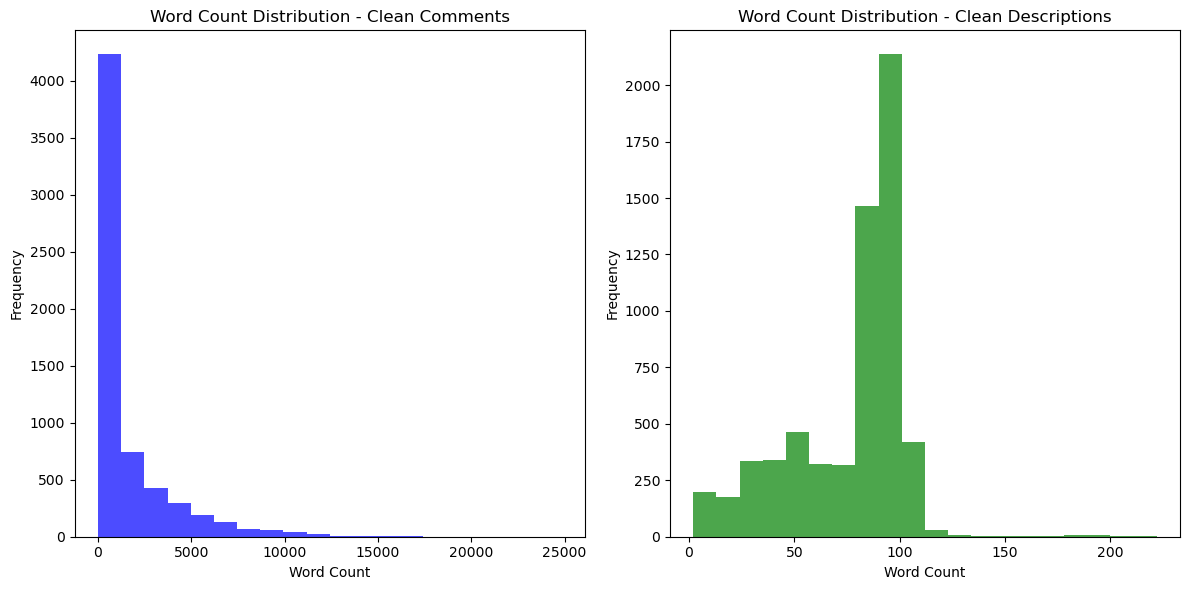

In [185]:
import matplotlib.pyplot as plt

# Calculate word count for clean comments and clean descriptions
clean_comments_word_count = grouped_df['clean_comments'].apply(lambda x: len(x.split()))
clean_description_word_count = grouped_df['clean_description'].apply(lambda x: len(x.split()))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for clean comments
axes[0].hist(clean_comments_word_count, bins=20, color='blue', alpha=0.7)
axes[0].set_title('Word Count Distribution - Clean Comments')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# Plot histogram for clean descriptions
axes[1].hist(clean_description_word_count, bins=20, color='green', alpha=0.7)
axes[1].set_title('Word Count Distribution - Clean Descriptions')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


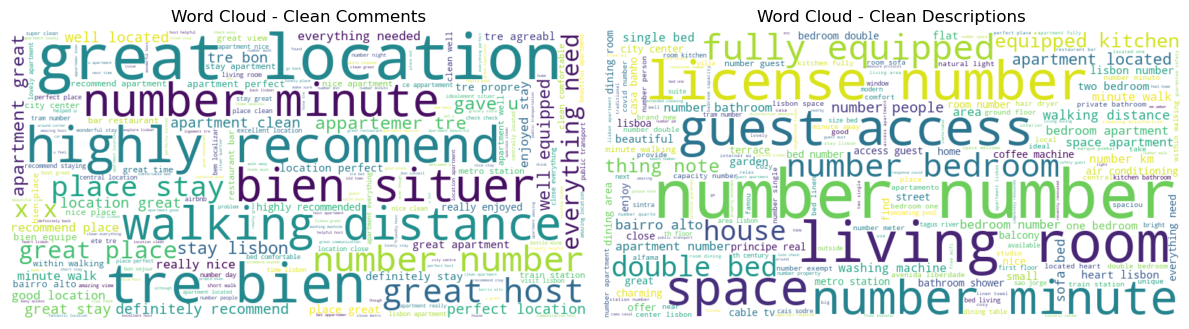

In [186]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for clean comments
comments_text = ' '.join(grouped_df['clean_comments'])
comments_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

# Generate word cloud for clean descriptions
descriptions_text = ' '.join(grouped_df['clean_description'])
descriptions_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(comments_wordcloud, interpolation='bilinear')
axes[0].set_title('Word Cloud - Clean Comments')
axes[0].axis('off')

axes[1].imshow(descriptions_wordcloud, interpolation='bilinear')
axes[1].set_title('Word Cloud - Clean Descriptions')
axes[1].axis('off')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beatrizsantos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


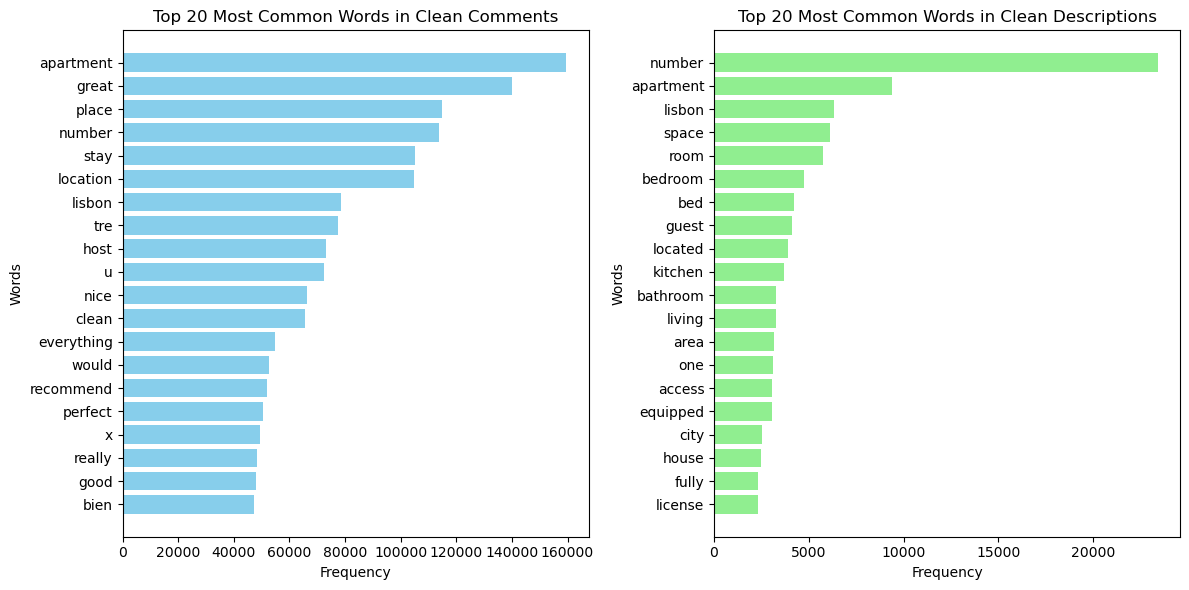

In [187]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data files (only needed once)
nltk.download('punkt')

# Assuming X_train_clean is your DataFrame

# Tokenize the text and count the word frequencies for 'clean_comments'
all_words_comments = word_tokenize(' '.join(grouped_df['clean_comments'].astype(str)))
word_freq_comments = Counter(all_words_comments)
common_words_comments = word_freq_comments.most_common(20)
words_comments, counts_comments = zip(*common_words_comments)

# Tokenize the text and count the word frequencies for 'clean_description'
all_words_description = word_tokenize(' '.join(grouped_df['clean_description'].astype(str)))
word_freq_description = Counter(all_words_description)
common_words_description = word_freq_description.most_common(20)
words_description, counts_description = zip(*common_words_description)

# Create the bar plot for 'clean_comments'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(words_comments, counts_comments, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Clean Comments')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top

# Create the bar plot for 'clean_description'
plt.subplot(1, 2, 2)
plt.barh(words_description, counts_description, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Clean Descriptions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top

plt.tight_layout()
plt.show()

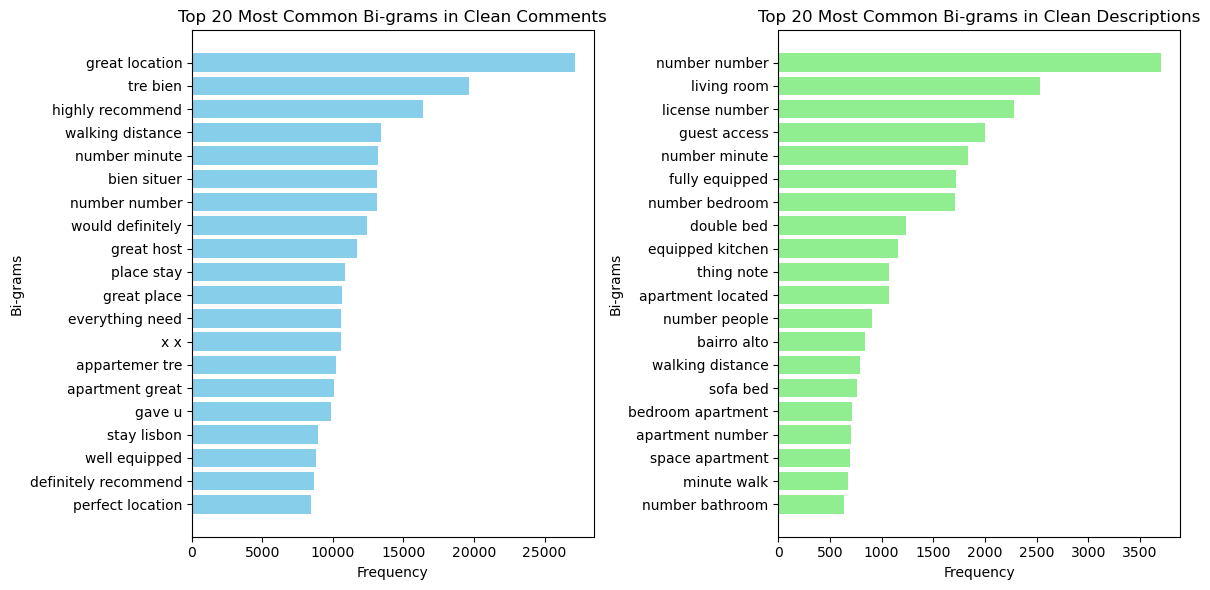

In [255]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import ngrams
import matplotlib.pyplot as plt

# Tokenize and get bi-grams for clean comments
all_words_comments = word_tokenize(' '.join(grouped_df['clean_comments'].astype(str)))
bi_grams_comments = list(ngrams(all_words_comments, 2))
bi_gram_freq_comments = Counter(bi_grams_comments)
common_bi_grams_comments = bi_gram_freq_comments.most_common(20)
bi_grams_comments, counts_comments = zip(*common_bi_grams_comments)

# Convert tuples to strings for plotting
bi_grams_comments = [' '.join(bi_gram) for bi_gram in bi_grams_comments]

# Tokenize and get bi-grams for clean descriptions
all_words_description = word_tokenize(' '.join(grouped_df['clean_description'].astype(str)))
bi_grams_description = list(ngrams(all_words_description, 2))
bi_gram_freq_description = Counter(bi_grams_description)
common_bi_grams_description = bi_gram_freq_description.most_common(20)
bi_grams_description, counts_description = zip(*common_bi_grams_description)

# Convert tuples to strings for plotting
bi_grams_description = [' '.join(bi_gram) for bi_gram in bi_grams_description]

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(bi_grams_comments, counts_comments, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.title('Top 20 Most Common Bi-grams in Clean Comments')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(bi_grams_description, counts_description, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.title('Top 20 Most Common Bi-grams in Clean Descriptions')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


# Train_Test_Split

In [204]:
grouped_df.set_index('houseID', inplace = True)

In [205]:
grouped_df

,unlisted,clean_comments,clean_description,comments_and_description
houseID,,,,
1,0,property absolutely clean stylish exactly show...,shared mixed room hostel shared bathroom locat...,property absolutely clean stylish exactly show...
2,1,comment,espaco ficar perto parque eduardo vii saldanha...,comment espaco ficar perto parque eduardo vii ...
3,1,comment,trafaria house cozy familiar villa facility ne...,comment trafaria house cozy familiar villa fac...
4,0,comment,apartamento charmoso chiar largo carmo travess...,comment apartamento charmoso chiar largo carmo...
5,0,tre bel appartemer magnifique voir plage mer t...,joli appartemer bordure mer number pied plage ...,tre bel appartemer magnifique voir plage mer t...
...,...,...,...,...
6244,0,apartment well presented photo description vas...,studio number new well decorated cozy apartmen...,apartment well presented photo description vas...
6245,0,clean well equipped apartment stay lisbon alth...,lisbon meet cosmopolitan industrial one bedroo...,clean well equipped apartment stay lisbon alth...
6246,1,logement idealement situer souhaiter visiter l...,license number exempt,logement idealement situer souhaiter visiter l...


In [220]:
from sklearn.model_selection import train_test_split

# Define the features and labels
X = grouped_df[['comments_and_description', 'clean_description','clean_comments']]
y = grouped_df[[ 'unlisted']]

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (4990, 3) (4990, 1)
Testing set shape: (1248, 1) (1248, 1)


In [221]:
X_train

,comments_and_description,clean_description,clean_comments
houseID,,,
1540,logement calme lumineux escalier raide logemen...,romantic townhouse middle lisbon historic cent...,logement calme lumineux escalier raide logemen...
4488,augusto excellent host check accommodating hel...,really ready feel like local stay equipped stu...,augusto excellent host check accommodating hel...
2245,overview x place locate almada road near igrej...,gather large skylit living room modern furnish...,overview x place locate almada road near igrej...
3129,comment apartment chalet early twentieth centu...,apartment chalet early twentieth century recen...,comment
1785,comment swallow hostel sinta casa,swallow hostel sinta casa,comment
...,...,...,...
6092,stayed room number night mixed feeling one han...,practical conveniently located room equipped a...,stayed room number night mixed feeling one han...
4283,vicky gave u warm welcome friendly pleasant un...,sunny lisbon apartment intendente area apartme...,vicky gave u warm welcome friendly pleasant un...
3053,catia marcos wonderful couple make feel home e...,modern number bedroom apartment one suite swim...,catia marcos wonderful couple make feel home e...


In [222]:
y_train

,unlisted
houseID,
1540,0
4488,0
2245,0
3129,1
1785,0
...,...
6092,0
4283,0
3053,0


In [223]:
X_val

,comments_and_description,clean_description,clean_comments
houseID,,,
775,comment due steep stair apartment suitable chi...,due steep stair apartment suitable child set p...,comment
4992,comment situar amoreira cascal estoril bem sit...,situar amoreira cascal estoril bem situar pert...,comment
658,fantastic view place look like picture clean c...,new renovated number bedroom apartment number ...,fantastic view place look like picture clean c...
2677,flat clean quite cute albeit slightly small lo...,ficar casa aconchegante ver cristo rei aqui te...,flat clean quite cute albeit slightly small lo...
4721,comment welcome lx history hotel lisbon portug...,welcome lx history hotel lisbon portugal locat...,comment
...,...,...,...
2368,comment beautiful holiday home large family se...,beautiful holiday home large family several co...,comment
1861,view flat stunning everything went cery smooth...,apartment ideal anyone want staying historic c...,view flat stunning everything went cery smooth...
5093,hospedagem tr noite fantastico cheio mimos lug...,enjoy paradise suite charming guest house carc...,hospedagem tr noite fantastico cheio mimos lug...


In [224]:
y_val

,unlisted
houseID,
775,1
4992,0
658,0
2677,1
4721,1
...,...
2368,0
1861,0
5093,0


In [225]:
# Calculate the percentage of 0 and 1 in the "unlisted" column for the train set
train_percentage = y_train['unlisted'].value_counts(normalize=True) * 100

# Calculate the percentage of 0 and 1 in the "unlisted" column for the validation set
val_percentage = y_val['unlisted'].value_counts(normalize=True) * 100

# Print the percentages
print("Train Set - Percentage of 0 and 1 in 'unlisted' column:")
print(train_percentage)
print("\nValidation Set - Percentage of 0 and 1 in 'unlisted' column:")
print(val_percentage)



Train Set - Percentage of 0 and 1 in 'unlisted' column:
0    72.685371
1    27.314629
Name: unlisted, dtype: float64

Validation Set - Percentage of 0 and 1 in 'unlisted' column:
0    72.676282
1    27.323718
Name: unlisted, dtype: float64


# Feature Engineering 

In [226]:
X_train

,comments_and_description,clean_description,clean_comments
houseID,,,
1540,logement calme lumineux escalier raide logemen...,romantic townhouse middle lisbon historic cent...,logement calme lumineux escalier raide logemen...
4488,augusto excellent host check accommodating hel...,really ready feel like local stay equipped stu...,augusto excellent host check accommodating hel...
2245,overview x place locate almada road near igrej...,gather large skylit living room modern furnish...,overview x place locate almada road near igrej...
3129,comment apartment chalet early twentieth centu...,apartment chalet early twentieth century recen...,comment
1785,comment swallow hostel sinta casa,swallow hostel sinta casa,comment
...,...,...,...
6092,stayed room number night mixed feeling one han...,practical conveniently located room equipped a...,stayed room number night mixed feeling one han...
4283,vicky gave u warm welcome friendly pleasant un...,sunny lisbon apartment intendente area apartme...,vicky gave u warm welcome friendly pleasant un...
3053,catia marcos wonderful couple make feel home e...,modern number bedroom apartment one suite swim...,catia marcos wonderful couple make feel home e...


In [228]:
X_train_bow = X_train.copy()
y_train_bow = y_train.copy()
X_val_bow = X_val.copy()
y_val_bow = y_val.copy()


## Bag of words

In [230]:
from sklearn.feature_extraction.text import CountVectorizer



In [232]:
bow = CountVectorizer(binary=True)
X_train_bow= bow.fit_transform(X_train_bow['comments_and_description'])

y_train_bow= np.array(y_train_bow)

X_val_bow=bow.transform(X_val_bow['comments_and_description'])

y_val_bow= np.array(y_val_bow)






In [239]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_bow_resampled, y_train_bow_resampled = smote.fit_resample(X_train_bow, y_train_bow)

print("Resampled training set shape:", X_train_bow_resampled.shape, y_train_bow_resampled.shape)

Resampled training set shape: (7254, 99813) (7254,)


## TF_IDF

In [250]:
X_train_tfidf = X_train.copy()
y_train_tfidf = y_train.copy()
X_val_tfidf = X_val.copy()
y_val_tfidf = y_val.copy()


In [251]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [252]:

def extract_tfidf_features(data, max_df=0.8, ngram_range=(1, 3)):
    tfidf_vectorizer = TfidfVectorizer(max_df=max_df, ngram_range=ngram_range)
    tfidf_features = tfidf_vectorizer.fit_transform(data)
    return tfidf_vectorizer, tfidf_features

# Extract TF-IDF features from the training data
tfidf_vectorizer, X_train_tfidf_features = extract_tfidf_features(X_train_tfidf['comments_and_description'], max_df=0.8, ngram_range=(1, 3))

# Extract TF-IDF features from the validation data
X_val_tfidf_features = tfidf_vectorizer.transform(X_val_tfidf['comments_and_description'])

In [258]:
def visualize_tfidf_features(tfidf_vectorizer, tfidf_features, document_index=0):
    # Get feature names
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Get the TF-IDF vector for the specified document
    document_tfidf = tfidf_features[document_index]
    
    # Convert the TF-IDF vector to a dense format and create a DataFrame
    df = pd.DataFrame(document_tfidf.T.todense(), index=feature_names, columns=["TF-IDF"])
    
    # Sort the DataFrame by the TF-IDF scores in descending order
    df = df.sort_values('TF-IDF', ascending=False)
    
    # Print the top 25 features
    print(df.head(25))

# Visualize the TF-IDF features for the first document in the training set
visualize_tfidf_features(tfidf_vectorizer, X_train_tfidf_features)

                                  TF-IDF
emanuel michaela                0.087882
emanuel                         0.077641
michaela                        0.076411
lisbon historic center          0.070404
location central close          0.057138
lissabon erkund                 0.056603
lisbon historic                 0.054413
lisbon                          0.047720
wohnung toll                    0.047035
konn angebot empfehlen          0.046058
great need provided             0.046058
quietness night perfect         0.046058
lage romantic                   0.046058
kommunikation emanuel michaela  0.046058
electrico within walking        0.046058
electrico within                0.046058
lage romantic townhouse         0.046058
little street hussle            0.046058
everything within walkin        0.046058
wohnung toll konn               0.046058
square although walk            0.046058
outmost attention               0.046058
river tejo comfortable          0.046058
outmost attentio

# Classification Models

## Bag of words + logistic regression

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_bow, y_train_bow)

# Predict on the validation data
y_pred = logreg.predict(X_val_bow)

# Print the classification report
print(classification_report(y_val_bow, y_pred))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       907
           1       0.71      0.72      0.71       341

    accuracy                           0.84      1248
   macro avg       0.80      0.80      0.80      1248
weighted avg       0.84      0.84      0.84      1248



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [236]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate metrics
accuracy = accuracy_score(y_val_bow, y_pred)
f1 = f1_score(y_val_bow, y_pred, average='weighted')
precision = precision_score(y_val_bow, y_pred, average='weighted')
recall = recall_score(y_val_bow, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.842948717948718
F1 Score: 0.8430916521932557
Precision: 0.8432394990659733
Recall: 0.842948717948718


In [234]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_val_bow, y_pred)

# Print the confusion matrix
print(cm)


[[808  99]
 [ 97 244]]


## GloVe Embeddings

In [22]:
import gensim.downloader as api

In [23]:
model = api.load("glove-wiki-gigaword-300")

[===-----------------------------------------------] 7.5% 28.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.6% 62.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.4% 99.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.6% 133.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.7% 171.7/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.6% 212.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.0% 251.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.6% 288.2/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.5% 329.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.2% 369.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
def apply_glove_embeddings(text):
    words = text.split()
    embeddings = [model[word] if word in model else np.zeros(model.vector_size)
                  for word in words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

In [25]:
X_train_embeddings = np.array([apply_glove_embeddings(text) for text in X_train_clean])

In [27]:
# é suposto aplicar isto ao val e ao test?

## Word Embedding with Word2Vec

In [315]:
#!pip install gensim nltk


In [316]:
from gensim.models import Word2Vec

In [317]:
model_word2vec = Word2Vec(sentences=X_train_clean["clean_comments"], vector_size=100, window=5, min_count=0, workers=4)

In [318]:
X_train_clean["clean_comments"]

0         very good stay and trip to lisbon x d the apar...
1         beautiful spot incredible setting and view lov...
2         thank you for making u feel very welcome charl...
3         que de compliment tres bon accueil appart ultr...
4         great location and perfect flat for two terass...
                                ...                        
282310    logement conforme a la description vraiment tr...
282311    great location stylish apartment with many ame...
282312    we had a great time at william s flat he wa ve...
282313                       i highly recommend this hostel
282314    da apartment war einfach super schon und auch ...
Name: clean_comments, Length: 282315, dtype: object

In [319]:
print(model_word2vec.wv.key_to_index.keys())

dict_keys([' ', 'e', 'a', 't', 'o', 'n', 'i', 'r', 's', 'l', 'd', 'h', 'u', 'c', 'm', 'p', 'y', 'g', 'w', 'f', 'b', 'v', 'k', 'x', 'q', 'j', 'z', 'N', 'U', 'M', 'B', 'E', 'R'])


In [320]:
word_vector = model_word2vec.wv['document']
print("Vector for 'document':", word_vector)

similar_words = model_word2vec.wv.most_similar('document')
print("Most similar words to 'document':", similar_words)

KeyError: "Key 'document' not present"